Group 01:

-Valentina Tonazzo

-Elena Zoppellari

-Sebastiano Monti

-Germán Cano Amaro

# DNN: analysis with Keras of 2D data

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.losses import *
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
from keras.layers import Input
import tensorflow as tf

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py #per cambiare cartella da cui prendere i dati, bisogna cambiare nome in questa funzione.

# training data
perc_train = 0.8 

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

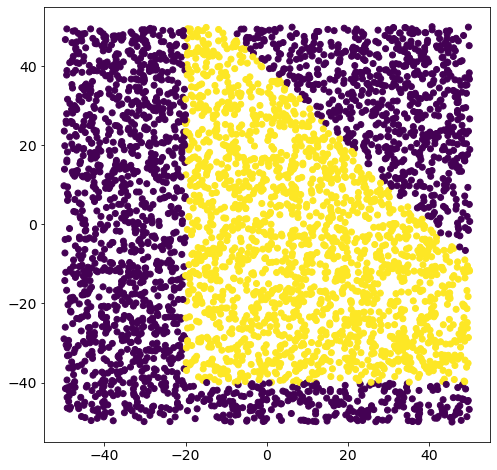

In [23]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y) #tutte le righe della colonna 0, tutte le righe della colonna 1
plt.show

### Split training and test data

In [7]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In this first general analysis we will keep this rescaling, then we will present different techniques to rescale the data, in order to find a method which improve accuracy.

In [24]:
def Rescale(x):
    return x/50

In [9]:
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras

We have created a general model who depends on differents parameters: 
* **layers**: correspond to the number of hidden layers+input layer;
* **activation**: the neurons' activation function;
* **neurons_per_layer**: as the name suggest, the number of neurons in each hidden layer;
* **dropout**: the probability of randomly dropout neurons during each step of the training;
* **optimizer**: algorithm/method used to reduce the loss;
* **kernel_initializer**: indicates the initial random weights of each layer.

In [25]:
# reproducibility
np.random.seed(12345)
#We define a model but not its parameters: they will be searched
CASE=1

if CASE==1:
    def create_DNN1(layers, activation, neurons_per_layer, dropout, optimizer,kernel_initializer):
        model = Sequential()
        for i in range(0, layers):
            if i == 0:
                model.add(Dense(L, input_shape=(L,), kernel_initializer=kernel_initializer, activation=activation))
            else:
                model.add(Dense(neurons_per_layer, activation=activation))
        model.add(Dropout(dropout))
        model.add(Dense(1, activation='sigmoid')) #we make this choice because predictions are binary
        model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
        return model
    nepoch=400

In [187]:
# create the deep neural net
model_org=create_DNN1(3, 'relu', 20, 0.2,'Adam','glorot_uniform')

# train DNN and store training info in history
fit_org=model_org.fit(x_train, y_train,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid, y_valid))

Train on 3200 samples, validate on 800 samples
Epoch 1/400
 - 2s - loss: 0.6867 - accuracy: 0.5722 - val_loss: 0.6782 - val_accuracy: 0.6263
Epoch 2/400
 - 0s - loss: 0.6498 - accuracy: 0.6762 - val_loss: 0.6375 - val_accuracy: 0.6363
Epoch 3/400
 - 0s - loss: 0.5949 - accuracy: 0.6819 - val_loss: 0.5882 - val_accuracy: 0.6263
Epoch 4/400
 - 0s - loss: 0.5506 - accuracy: 0.6875 - val_loss: 0.5561 - val_accuracy: 0.6400
Epoch 5/400
 - 0s - loss: 0.5244 - accuracy: 0.7053 - val_loss: 0.5312 - val_accuracy: 0.6562
Epoch 6/400
 - 0s - loss: 0.5029 - accuracy: 0.7287 - val_loss: 0.5043 - val_accuracy: 0.7262
Epoch 7/400
 - 0s - loss: 0.4783 - accuracy: 0.7653 - val_loss: 0.4780 - val_accuracy: 0.7625
Epoch 8/400
 - 0s - loss: 0.4497 - accuracy: 0.7866 - val_loss: 0.4448 - val_accuracy: 0.7825
Epoch 9/400
 - 0s - loss: 0.4236 - accuracy: 0.8138 - val_loss: 0.4085 - val_accuracy: 0.8288
Epoch 10/400
 - 0s - loss: 0.3877 - accuracy: 0.8384 - val_loss: 0.3647 - val_accuracy: 0.8537
Epoch 11/400

Epoch 87/400
 - 0s - loss: 0.1170 - accuracy: 0.9534 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 88/400
 - 0s - loss: 0.1113 - accuracy: 0.9575 - val_loss: 0.0968 - val_accuracy: 0.9688
Epoch 89/400
 - 0s - loss: 0.1122 - accuracy: 0.9578 - val_loss: 0.0982 - val_accuracy: 0.9675
Epoch 90/400
 - 0s - loss: 0.1085 - accuracy: 0.9600 - val_loss: 0.0962 - val_accuracy: 0.9663
Epoch 91/400
 - 0s - loss: 0.1109 - accuracy: 0.9566 - val_loss: 0.0932 - val_accuracy: 0.9725
Epoch 92/400
 - 0s - loss: 0.1091 - accuracy: 0.9584 - val_loss: 0.0953 - val_accuracy: 0.9650
Epoch 93/400
 - 0s - loss: 0.1078 - accuracy: 0.9584 - val_loss: 0.0932 - val_accuracy: 0.9725
Epoch 94/400
 - 0s - loss: 0.1098 - accuracy: 0.9606 - val_loss: 0.0939 - val_accuracy: 0.9700
Epoch 95/400
 - 0s - loss: 0.1089 - accuracy: 0.9575 - val_loss: 0.1005 - val_accuracy: 0.9550
Epoch 96/400
 - 0s - loss: 0.1095 - accuracy: 0.9528 - val_loss: 0.0937 - val_accuracy: 0.9737
Epoch 97/400
 - 0s - loss: 0.1028 - accuracy: 0.96

Epoch 173/400
 - 0s - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.0520 - val_accuracy: 0.9862
Epoch 174/400
 - 0s - loss: 0.0575 - accuracy: 0.9791 - val_loss: 0.0586 - val_accuracy: 0.9775
Epoch 175/400
 - 0s - loss: 0.0567 - accuracy: 0.9806 - val_loss: 0.0602 - val_accuracy: 0.9787
Epoch 176/400
 - 0s - loss: 0.0612 - accuracy: 0.9772 - val_loss: 0.0553 - val_accuracy: 0.9787
Epoch 177/400
 - 0s - loss: 0.0550 - accuracy: 0.9822 - val_loss: 0.0510 - val_accuracy: 0.9850
Epoch 178/400
 - 0s - loss: 0.0601 - accuracy: 0.9781 - val_loss: 0.0536 - val_accuracy: 0.9862
Epoch 179/400
 - 0s - loss: 0.0561 - accuracy: 0.9812 - val_loss: 0.0581 - val_accuracy: 0.9800
Epoch 180/400
 - 0s - loss: 0.0589 - accuracy: 0.9787 - val_loss: 0.0748 - val_accuracy: 0.9688
Epoch 181/400
 - 0s - loss: 0.0615 - accuracy: 0.9781 - val_loss: 0.0547 - val_accuracy: 0.9800
Epoch 182/400
 - 0s - loss: 0.0572 - accuracy: 0.9794 - val_loss: 0.0569 - val_accuracy: 0.9800
Epoch 183/400
 - 0s - loss: 0.0538 - acc

Epoch 259/400
 - 0s - loss: 0.0402 - accuracy: 0.9847 - val_loss: 0.0305 - val_accuracy: 0.9912
Epoch 260/400
 - 0s - loss: 0.0364 - accuracy: 0.9853 - val_loss: 0.0312 - val_accuracy: 0.9875
Epoch 261/400
 - 0s - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9850
Epoch 262/400
 - 0s - loss: 0.0393 - accuracy: 0.9828 - val_loss: 0.0291 - val_accuracy: 0.9887
Epoch 263/400
 - 0s - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0240 - val_accuracy: 0.9937
Epoch 264/400
 - 0s - loss: 0.0379 - accuracy: 0.9841 - val_loss: 0.0304 - val_accuracy: 0.9925
Epoch 265/400
 - 0s - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.0304 - val_accuracy: 0.9875
Epoch 266/400
 - 0s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0252 - val_accuracy: 0.9937
Epoch 267/400
 - 0s - loss: 0.0347 - accuracy: 0.9859 - val_loss: 0.0268 - val_accuracy: 0.9912
Epoch 268/400
 - 0s - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 269/400
 - 0s - loss: 0.0406 - acc

Epoch 345/400
 - 0s - loss: 0.0318 - accuracy: 0.9881 - val_loss: 0.0200 - val_accuracy: 0.9962
Epoch 346/400
 - 0s - loss: 0.0286 - accuracy: 0.9891 - val_loss: 0.0297 - val_accuracy: 0.9875
Epoch 347/400
 - 0s - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0208 - val_accuracy: 0.9950
Epoch 348/400
 - 0s - loss: 0.0330 - accuracy: 0.9881 - val_loss: 0.0217 - val_accuracy: 0.9950
Epoch 349/400
 - 0s - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0234 - val_accuracy: 0.9925
Epoch 350/400
 - 0s - loss: 0.0312 - accuracy: 0.9878 - val_loss: 0.0237 - val_accuracy: 0.9900
Epoch 351/400
 - 0s - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0250 - val_accuracy: 0.9912
Epoch 352/400
 - 0s - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.0181 - val_accuracy: 0.9937
Epoch 353/400
 - 0s - loss: 0.0283 - accuracy: 0.9894 - val_loss: 0.0269 - val_accuracy: 0.9887
Epoch 354/400
 - 0s - loss: 0.0343 - accuracy: 0.9853 - val_loss: 0.0295 - val_accuracy: 0.9875
Epoch 355/400
 - 0s - loss: 0.0300 - acc

In [188]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid1 = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid1[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid1))
print(grid1[-1])

# RESCALE

grid1_r = grid1/50

pred1 = model_org.predict(grid1_r)

51 ****** 2601
[50. 50.]
[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


In [189]:
# evaluate model
score1 = model_org.evaluate(x_valid, y_valid, verbose=2)

# print performance
print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])


Test loss: 0.018109172866970766
Test accuracy: 0.9950000047683716


### REDUCED DATA

In [32]:
TYPE=1
x_red = np.loadtxt(filename_red("data",TYPE), delimiter=' ')
y_red = np.loadtxt(filename_red("labels",TYPE), delimiter=' ')
N_red = len(x_red)

# dim. of a sample
L = len(x_red[0])

for i in range(10):
    print(x_red[i],y_red[i])

N_train_red = int(perc_train * N_red)

[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0


In [33]:
(x_train_red, y_train_red) = (x_red[0:N_train_red],y_red[0:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

In [34]:
# create the deep neural net
model_red1=create_DNN1(3, 'relu', 20, 0.2,'Adam','glorot_uniform') #best parameters for now


# train DNN and store training info in history
fit_red1=model_red1.fit(x_train_red, y_train_red,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_red, y_valid_red))

Train on 320 samples, validate on 80 samples
Epoch 1/400
 - 1s - loss: 0.6934 - accuracy: 0.4938 - val_loss: 0.6901 - val_accuracy: 0.7375
Epoch 2/400
 - 0s - loss: 0.6897 - accuracy: 0.6187 - val_loss: 0.6858 - val_accuracy: 0.7375
Epoch 3/400
 - 0s - loss: 0.6852 - accuracy: 0.6938 - val_loss: 0.6823 - val_accuracy: 0.7375
Epoch 4/400
 - 0s - loss: 0.6834 - accuracy: 0.7000 - val_loss: 0.6791 - val_accuracy: 0.7250
Epoch 5/400
 - 0s - loss: 0.6800 - accuracy: 0.6812 - val_loss: 0.6757 - val_accuracy: 0.7250
Epoch 6/400
 - 0s - loss: 0.6761 - accuracy: 0.6844 - val_loss: 0.6727 - val_accuracy: 0.7250
Epoch 7/400
 - 0s - loss: 0.6718 - accuracy: 0.6687 - val_loss: 0.6695 - val_accuracy: 0.7250
Epoch 8/400
 - 0s - loss: 0.6693 - accuracy: 0.6844 - val_loss: 0.6657 - val_accuracy: 0.7375
Epoch 9/400
 - 0s - loss: 0.6663 - accuracy: 0.6875 - val_loss: 0.6622 - val_accuracy: 0.7375
Epoch 10/400
 - 0s - loss: 0.6616 - accuracy: 0.6781 - val_loss: 0.6587 - val_accuracy: 0.7375
Epoch 11/400
 

Epoch 87/400
 - 0s - loss: 0.4339 - accuracy: 0.8250 - val_loss: 0.4515 - val_accuracy: 0.7875
Epoch 88/400
 - 0s - loss: 0.4404 - accuracy: 0.8188 - val_loss: 0.4480 - val_accuracy: 0.7875
Epoch 89/400
 - 0s - loss: 0.4422 - accuracy: 0.8062 - val_loss: 0.4470 - val_accuracy: 0.8000
Epoch 90/400
 - 0s - loss: 0.4328 - accuracy: 0.8094 - val_loss: 0.4448 - val_accuracy: 0.8000
Epoch 91/400
 - 0s - loss: 0.4385 - accuracy: 0.8156 - val_loss: 0.4419 - val_accuracy: 0.8000
Epoch 92/400
 - 0s - loss: 0.4282 - accuracy: 0.8094 - val_loss: 0.4387 - val_accuracy: 0.8000
Epoch 93/400
 - 0s - loss: 0.4239 - accuracy: 0.8250 - val_loss: 0.4364 - val_accuracy: 0.8000
Epoch 94/400
 - 0s - loss: 0.4207 - accuracy: 0.8156 - val_loss: 0.4331 - val_accuracy: 0.8000
Epoch 95/400
 - 0s - loss: 0.4159 - accuracy: 0.8156 - val_loss: 0.4300 - val_accuracy: 0.8000
Epoch 96/400
 - 0s - loss: 0.4172 - accuracy: 0.8281 - val_loss: 0.4278 - val_accuracy: 0.8000
Epoch 97/400
 - 0s - loss: 0.4180 - accuracy: 0.82

Epoch 173/400
 - 0s - loss: 0.2462 - accuracy: 0.9219 - val_loss: 0.2207 - val_accuracy: 0.9125
Epoch 174/400
 - 0s - loss: 0.2453 - accuracy: 0.9187 - val_loss: 0.2200 - val_accuracy: 0.9250
Epoch 175/400
 - 0s - loss: 0.2595 - accuracy: 0.9031 - val_loss: 0.2191 - val_accuracy: 0.9250
Epoch 176/400
 - 0s - loss: 0.2595 - accuracy: 0.9031 - val_loss: 0.2198 - val_accuracy: 0.9000
Epoch 177/400
 - 0s - loss: 0.2463 - accuracy: 0.9031 - val_loss: 0.2188 - val_accuracy: 0.8875
Epoch 178/400
 - 0s - loss: 0.2305 - accuracy: 0.9187 - val_loss: 0.2176 - val_accuracy: 0.9125
Epoch 179/400
 - 0s - loss: 0.2506 - accuracy: 0.9062 - val_loss: 0.2175 - val_accuracy: 0.9000
Epoch 180/400
 - 0s - loss: 0.2277 - accuracy: 0.9094 - val_loss: 0.2167 - val_accuracy: 0.9000
Epoch 181/400
 - 0s - loss: 0.2402 - accuracy: 0.9187 - val_loss: 0.2158 - val_accuracy: 0.9000
Epoch 182/400
 - 0s - loss: 0.2345 - accuracy: 0.9156 - val_loss: 0.2154 - val_accuracy: 0.9000
Epoch 183/400
 - 0s - loss: 0.2436 - acc

Epoch 259/400
 - 0s - loss: 0.2089 - accuracy: 0.9281 - val_loss: 0.1921 - val_accuracy: 0.9250
Epoch 260/400
 - 0s - loss: 0.2064 - accuracy: 0.9094 - val_loss: 0.1915 - val_accuracy: 0.9000
Epoch 261/400
 - 0s - loss: 0.2182 - accuracy: 0.9062 - val_loss: 0.1949 - val_accuracy: 0.9250
Epoch 262/400
 - 0s - loss: 0.1994 - accuracy: 0.9250 - val_loss: 0.1994 - val_accuracy: 0.9125
Epoch 263/400
 - 0s - loss: 0.2229 - accuracy: 0.9062 - val_loss: 0.1972 - val_accuracy: 0.9125
Epoch 264/400
 - 0s - loss: 0.1955 - accuracy: 0.9312 - val_loss: 0.1987 - val_accuracy: 0.9000
Epoch 265/400
 - 0s - loss: 0.2081 - accuracy: 0.9250 - val_loss: 0.1950 - val_accuracy: 0.9000
Epoch 266/400
 - 0s - loss: 0.2044 - accuracy: 0.9187 - val_loss: 0.1934 - val_accuracy: 0.8875
Epoch 267/400
 - 0s - loss: 0.2097 - accuracy: 0.9156 - val_loss: 0.1925 - val_accuracy: 0.9000
Epoch 268/400
 - 0s - loss: 0.2010 - accuracy: 0.9281 - val_loss: 0.1933 - val_accuracy: 0.8875
Epoch 269/400
 - 0s - loss: 0.2037 - acc

Epoch 345/400
 - 0s - loss: 0.1862 - accuracy: 0.9406 - val_loss: 0.1923 - val_accuracy: 0.8750
Epoch 346/400
 - 0s - loss: 0.1795 - accuracy: 0.9344 - val_loss: 0.1911 - val_accuracy: 0.8750
Epoch 347/400
 - 0s - loss: 0.2042 - accuracy: 0.9187 - val_loss: 0.1924 - val_accuracy: 0.8750
Epoch 348/400
 - 0s - loss: 0.2032 - accuracy: 0.9125 - val_loss: 0.1942 - val_accuracy: 0.8875
Epoch 349/400
 - 0s - loss: 0.1855 - accuracy: 0.9312 - val_loss: 0.1945 - val_accuracy: 0.8875
Epoch 350/400
 - 0s - loss: 0.2055 - accuracy: 0.9250 - val_loss: 0.1971 - val_accuracy: 0.8750
Epoch 351/400
 - 0s - loss: 0.1845 - accuracy: 0.9281 - val_loss: 0.1965 - val_accuracy: 0.8875
Epoch 352/400
 - 0s - loss: 0.1854 - accuracy: 0.9312 - val_loss: 0.1939 - val_accuracy: 0.9000
Epoch 353/400
 - 0s - loss: 0.1867 - accuracy: 0.9250 - val_loss: 0.1913 - val_accuracy: 0.8750
Epoch 354/400
 - 0s - loss: 0.1916 - accuracy: 0.9281 - val_loss: 0.1915 - val_accuracy: 0.9125
Epoch 355/400
 - 0s - loss: 0.1983 - acc

In [35]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1

# RESCALE

grid_r = grid/50

pred_red1 = model_red1.predict(grid_r)

In [36]:
# evaluate model
score_red1 = model_red1.evaluate(x_valid_red, y_valid_red, verbose=2)

# print performance
print('Test loss:', score_red1[0])
print('Test accuracy:', score_red1[1])

Test loss: 0.19184156656265258
Test accuracy: 0.875


### INCREASED DATA

In [37]:
TYPE=1
x_incr = np.loadtxt(filename_incr("data",TYPE), delimiter=' ')
y_incr = np.loadtxt(filename_incr("labels",TYPE), delimiter=' ')
N_incr = len(x_incr)

# dim. of a sample
L = len(x_incr[0])

for i in range(10):
    print(x_incr[i],y_incr[i])

N_train_incr = int(perc_train * N_incr)

[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0


In [38]:
(x_train_incr, y_train_incr) = (x_incr[0:N_train_incr],y_incr[0:N_train_incr])
(x_valid_incr, y_valid_incr) = (x_incr[N_train_incr:],y_incr[N_train_incr:])
x_train_incr = Rescale(x_train_incr)
x_valid_incr = Rescale(x_valid_incr)

In [40]:
# create the deep neural net
model_incr1=create_DNN1(3, 'relu', 20, 0.2,'Adam','glorot_uniform') #best parameters for now

# train DNN and store training info in history
fit_incr1=model_incr1.fit(x_train_incr, y_train_incr,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_incr, y_valid_incr))

Train on 8000 samples, validate on 2000 samples
Epoch 1/400
 - 1s - loss: 0.6687 - accuracy: 0.6600 - val_loss: 0.6494 - val_accuracy: 0.6690
Epoch 2/400
 - 0s - loss: 0.6283 - accuracy: 0.6876 - val_loss: 0.6012 - val_accuracy: 0.7030
Epoch 3/400
 - 0s - loss: 0.5653 - accuracy: 0.7361 - val_loss: 0.5211 - val_accuracy: 0.7660
Epoch 4/400
 - 0s - loss: 0.4929 - accuracy: 0.7760 - val_loss: 0.4483 - val_accuracy: 0.8055
Epoch 5/400
 - 0s - loss: 0.4215 - accuracy: 0.8130 - val_loss: 0.3770 - val_accuracy: 0.8305
Epoch 6/400
 - 0s - loss: 0.3571 - accuracy: 0.8435 - val_loss: 0.3065 - val_accuracy: 0.8665
Epoch 7/400
 - 0s - loss: 0.2815 - accuracy: 0.8830 - val_loss: 0.2340 - val_accuracy: 0.9095
Epoch 8/400
 - 0s - loss: 0.2200 - accuracy: 0.9169 - val_loss: 0.1809 - val_accuracy: 0.9435
Epoch 9/400
 - 0s - loss: 0.1829 - accuracy: 0.9331 - val_loss: 0.1502 - val_accuracy: 0.9600
Epoch 10/400
 - 0s - loss: 0.1523 - accuracy: 0.9474 - val_loss: 0.1281 - val_accuracy: 0.9670
Epoch 11/40

Epoch 87/400
 - 0s - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.0137 - val_accuracy: 0.9950
Epoch 88/400
 - 0s - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0168 - val_accuracy: 0.9905
Epoch 89/400
 - 0s - loss: 0.0171 - accuracy: 0.9927 - val_loss: 0.0162 - val_accuracy: 0.9930
Epoch 90/400
 - 0s - loss: 0.0187 - accuracy: 0.9923 - val_loss: 0.0166 - val_accuracy: 0.9925
Epoch 91/400
 - 0s - loss: 0.0183 - accuracy: 0.9924 - val_loss: 0.0134 - val_accuracy: 0.9950
Epoch 92/400
 - 1s - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0132 - val_accuracy: 0.9955
Epoch 93/400
 - 0s - loss: 0.0175 - accuracy: 0.9929 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 94/400
 - 0s - loss: 0.0223 - accuracy: 0.9908 - val_loss: 0.0146 - val_accuracy: 0.9930
Epoch 95/400
 - 0s - loss: 0.0186 - accuracy: 0.9912 - val_loss: 0.0144 - val_accuracy: 0.9935
Epoch 96/400
 - 0s - loss: 0.0165 - accuracy: 0.9931 - val_loss: 0.0162 - val_accuracy: 0.9955
Epoch 97/400
 - 0s - loss: 0.0158 - accuracy: 0.99

Epoch 173/400
 - 0s - loss: 0.0132 - accuracy: 0.9941 - val_loss: 0.0185 - val_accuracy: 0.9925
Epoch 174/400
 - 0s - loss: 0.0130 - accuracy: 0.9951 - val_loss: 0.0088 - val_accuracy: 0.9970
Epoch 175/400
 - 0s - loss: 0.0142 - accuracy: 0.9935 - val_loss: 0.0185 - val_accuracy: 0.9920
Epoch 176/400
 - 0s - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0174 - val_accuracy: 0.9925
Epoch 177/400
 - 0s - loss: 0.0134 - accuracy: 0.9941 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 178/400
 - 0s - loss: 0.0154 - accuracy: 0.9934 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 179/400
 - 0s - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0123 - val_accuracy: 0.9935
Epoch 180/400
 - 0s - loss: 0.0145 - accuracy: 0.9941 - val_loss: 0.0131 - val_accuracy: 0.9955
Epoch 181/400
 - 0s - loss: 0.0156 - accuracy: 0.9924 - val_loss: 0.0214 - val_accuracy: 0.9885
Epoch 182/400
 - 0s - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.0119 - val_accuracy: 0.9950
Epoch 183/400
 - 0s - loss: 0.0121 - acc

Epoch 259/400
 - 0s - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.0465 - val_accuracy: 0.9840
Epoch 260/400
 - 0s - loss: 0.0158 - accuracy: 0.9929 - val_loss: 0.0190 - val_accuracy: 0.9915
Epoch 261/400
 - 0s - loss: 0.0113 - accuracy: 0.9952 - val_loss: 0.0096 - val_accuracy: 0.9950
Epoch 262/400
 - 0s - loss: 0.0130 - accuracy: 0.9941 - val_loss: 0.0078 - val_accuracy: 0.9985
Epoch 263/400
 - 0s - loss: 0.0124 - accuracy: 0.9951 - val_loss: 0.0122 - val_accuracy: 0.9940
Epoch 264/400
 - 0s - loss: 0.0124 - accuracy: 0.9945 - val_loss: 0.0098 - val_accuracy: 0.9975
Epoch 265/400
 - 0s - loss: 0.0135 - accuracy: 0.9946 - val_loss: 0.0084 - val_accuracy: 0.9975
Epoch 266/400
 - 0s - loss: 0.0187 - accuracy: 0.9925 - val_loss: 0.0134 - val_accuracy: 0.9950
Epoch 267/400
 - 0s - loss: 0.0135 - accuracy: 0.9948 - val_loss: 0.0195 - val_accuracy: 0.9920
Epoch 268/400
 - 0s - loss: 0.0121 - accuracy: 0.9944 - val_loss: 0.0087 - val_accuracy: 0.9970
Epoch 269/400
 - 0s - loss: 0.0110 - acc

Epoch 345/400
 - 0s - loss: 0.0093 - accuracy: 0.9964 - val_loss: 0.0055 - val_accuracy: 0.9985
Epoch 346/400
 - 0s - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0097 - val_accuracy: 0.9960
Epoch 347/400
 - 0s - loss: 0.0096 - accuracy: 0.9962 - val_loss: 0.0211 - val_accuracy: 0.9920
Epoch 348/400
 - 0s - loss: 0.0142 - accuracy: 0.9944 - val_loss: 0.0088 - val_accuracy: 0.9980
Epoch 349/400
 - 0s - loss: 0.0120 - accuracy: 0.9951 - val_loss: 0.0070 - val_accuracy: 0.9980
Epoch 350/400
 - 0s - loss: 0.0113 - accuracy: 0.9949 - val_loss: 0.0093 - val_accuracy: 0.9955
Epoch 351/400
 - 0s - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0080 - val_accuracy: 0.9980
Epoch 352/400
 - 1s - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.0096 - val_accuracy: 0.9955
Epoch 353/400
 - 0s - loss: 0.0118 - accuracy: 0.9946 - val_loss: 0.0089 - val_accuracy: 0.9945
Epoch 354/400
 - 0s - loss: 0.0133 - accuracy: 0.9941 - val_loss: 0.0098 - val_accuracy: 0.9950
Epoch 355/400
 - 0s - loss: 0.0109 - acc

In [41]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE
grid_r = grid/50

print(grid_r)

pred_incr1 = model_incr1.predict(grid_r)

51 ****** 2601
[50. 50.]
[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


In [42]:
# evaluate model
score_incr1 = model_incr1.evaluate(x_valid_incr, y_valid_incr, verbose=2)

# print performance
print('Test loss:', score_incr1[0])
print('Test accuracy:', score_incr1[1])

Test loss: 0.009635408804971718
Test accuracy: 0.9955000281333923


### AUGEMENTED DATA

In [43]:
TYPE=1
x_aug = np.loadtxt(filename("data",TYPE), delimiter=' ')      #non serve creare una nuova cartella, i dati vengono presi dalla cartella iniziale 'DATA' 
y_aug = np.loadtxt(filename("labels",TYPE), delimiter=' ')

#creating noise
x1_noise = np.random.normal(0,2,4000)
x2_noise = np.random.normal(0,2,4000)
x_noise = np.array((x1_noise,x2_noise)).T

#concatenating noise+samples
x_aug = np.concatenate((x_aug,x_aug+x_noise))
y_aug = np.concatenate((y_aug,y_aug))
print("X augmentated:",x_aug.shape) 

N_aug = len(x_aug)

# dim. of a sample
L = len(x_aug[0])

N_train_aug = int(perc_train * N_aug)

X augmentated: (8000, 2)


In [44]:
(x_train_aug, y_train_aug) = (x_aug[0:N_train_aug],y_aug[0:N_train_aug])
(x_valid_aug, y_valid_aug) = (x_aug[N_train_aug:],y_aug[N_train_aug:])
x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [46]:
# create the deep neural net
model_aug1=create_DNN1(3, 'relu', 20, 0.2,'Adam','glorot_uniform') #best parameters for now


# train DNN and store training info in history
fit_aug1=model_aug1.fit(x_train_aug, y_train_aug,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_aug, y_valid_aug))

Train on 6400 samples, validate on 1600 samples
Epoch 1/400
 - 1s - loss: 0.6786 - accuracy: 0.6239 - val_loss: 0.6504 - val_accuracy: 0.7381
Epoch 2/400
 - 0s - loss: 0.5974 - accuracy: 0.7230 - val_loss: 0.5321 - val_accuracy: 0.7469
Epoch 3/400
 - 0s - loss: 0.5116 - accuracy: 0.7606 - val_loss: 0.4859 - val_accuracy: 0.7769
Epoch 4/400
 - 0s - loss: 0.4859 - accuracy: 0.7734 - val_loss: 0.4735 - val_accuracy: 0.7844
Epoch 5/400
 - 0s - loss: 0.4765 - accuracy: 0.7772 - val_loss: 0.4662 - val_accuracy: 0.7862
Epoch 6/400
 - 0s - loss: 0.4685 - accuracy: 0.7809 - val_loss: 0.4565 - val_accuracy: 0.7925
Epoch 7/400
 - 0s - loss: 0.4618 - accuracy: 0.7862 - val_loss: 0.4503 - val_accuracy: 0.7937
Epoch 8/400
 - 0s - loss: 0.4559 - accuracy: 0.7908 - val_loss: 0.4422 - val_accuracy: 0.7994
Epoch 9/400
 - 0s - loss: 0.4467 - accuracy: 0.7975 - val_loss: 0.4371 - val_accuracy: 0.8075
Epoch 10/400
 - 0s - loss: 0.4422 - accuracy: 0.8003 - val_loss: 0.4275 - val_accuracy: 0.8106
Epoch 11/40

Epoch 87/400
 - 0s - loss: 0.0753 - accuracy: 0.9725 - val_loss: 0.1072 - val_accuracy: 0.9606
Epoch 88/400
 - 0s - loss: 0.0717 - accuracy: 0.9745 - val_loss: 0.1136 - val_accuracy: 0.9563
Epoch 89/400
 - 0s - loss: 0.0720 - accuracy: 0.9744 - val_loss: 0.1036 - val_accuracy: 0.9606
Epoch 90/400
 - 0s - loss: 0.0708 - accuracy: 0.9747 - val_loss: 0.1102 - val_accuracy: 0.9588
Epoch 91/400
 - 0s - loss: 0.0745 - accuracy: 0.9723 - val_loss: 0.1039 - val_accuracy: 0.9631
Epoch 92/400
 - 0s - loss: 0.0722 - accuracy: 0.9753 - val_loss: 0.1008 - val_accuracy: 0.9638
Epoch 93/400
 - 0s - loss: 0.0674 - accuracy: 0.9773 - val_loss: 0.1001 - val_accuracy: 0.9613
Epoch 94/400
 - 0s - loss: 0.0708 - accuracy: 0.9758 - val_loss: 0.1139 - val_accuracy: 0.9563
Epoch 95/400
 - 0s - loss: 0.0724 - accuracy: 0.9730 - val_loss: 0.0994 - val_accuracy: 0.9619
Epoch 96/400
 - 0s - loss: 0.0685 - accuracy: 0.9769 - val_loss: 0.0986 - val_accuracy: 0.9650
Epoch 97/400
 - 0s - loss: 0.0688 - accuracy: 0.97

Epoch 173/400
 - 0s - loss: 0.0632 - accuracy: 0.9769 - val_loss: 0.0973 - val_accuracy: 0.9638
Epoch 174/400
 - 0s - loss: 0.0633 - accuracy: 0.9767 - val_loss: 0.0964 - val_accuracy: 0.9638
Epoch 175/400
 - 0s - loss: 0.0632 - accuracy: 0.9766 - val_loss: 0.1045 - val_accuracy: 0.9613
Epoch 176/400
 - 0s - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.1022 - val_accuracy: 0.9644
Epoch 177/400
 - 0s - loss: 0.0604 - accuracy: 0.9770 - val_loss: 0.1031 - val_accuracy: 0.9625
Epoch 178/400
 - 0s - loss: 0.0660 - accuracy: 0.9752 - val_loss: 0.1115 - val_accuracy: 0.9606
Epoch 179/400
 - 0s - loss: 0.0636 - accuracy: 0.9758 - val_loss: 0.1005 - val_accuracy: 0.9619
Epoch 180/400
 - 0s - loss: 0.0593 - accuracy: 0.9792 - val_loss: 0.1005 - val_accuracy: 0.9619
Epoch 181/400
 - 0s - loss: 0.0673 - accuracy: 0.9767 - val_loss: 0.0985 - val_accuracy: 0.9619
Epoch 182/400
 - 0s - loss: 0.0577 - accuracy: 0.9800 - val_loss: 0.1079 - val_accuracy: 0.9619
Epoch 183/400
 - 0s - loss: 0.0628 - acc

Epoch 259/400
 - 0s - loss: 0.0660 - accuracy: 0.9753 - val_loss: 0.0952 - val_accuracy: 0.9650
Epoch 260/400
 - 0s - loss: 0.0598 - accuracy: 0.9781 - val_loss: 0.1027 - val_accuracy: 0.9631
Epoch 261/400
 - 0s - loss: 0.0633 - accuracy: 0.9777 - val_loss: 0.0969 - val_accuracy: 0.9669
Epoch 262/400
 - 0s - loss: 0.0648 - accuracy: 0.9783 - val_loss: 0.0961 - val_accuracy: 0.9663
Epoch 263/400
 - 0s - loss: 0.0623 - accuracy: 0.9791 - val_loss: 0.0969 - val_accuracy: 0.9656
Epoch 264/400
 - 0s - loss: 0.0582 - accuracy: 0.9792 - val_loss: 0.0976 - val_accuracy: 0.9650
Epoch 265/400
 - 0s - loss: 0.0651 - accuracy: 0.9772 - val_loss: 0.1173 - val_accuracy: 0.9600
Epoch 266/400
 - 0s - loss: 0.0617 - accuracy: 0.9777 - val_loss: 0.1028 - val_accuracy: 0.9619
Epoch 267/400
 - 0s - loss: 0.0658 - accuracy: 0.9755 - val_loss: 0.1058 - val_accuracy: 0.9631
Epoch 268/400
 - 0s - loss: 0.0661 - accuracy: 0.9777 - val_loss: 0.0989 - val_accuracy: 0.9650
Epoch 269/400
 - 0s - loss: 0.0610 - acc

Epoch 345/400
 - 0s - loss: 0.0595 - accuracy: 0.9795 - val_loss: 0.1016 - val_accuracy: 0.9619
Epoch 346/400
 - 0s - loss: 0.0594 - accuracy: 0.9786 - val_loss: 0.0957 - val_accuracy: 0.9663
Epoch 347/400
 - 0s - loss: 0.0594 - accuracy: 0.9784 - val_loss: 0.1011 - val_accuracy: 0.9656
Epoch 348/400
 - 0s - loss: 0.0607 - accuracy: 0.9794 - val_loss: 0.1048 - val_accuracy: 0.9606
Epoch 349/400
 - 0s - loss: 0.0602 - accuracy: 0.9770 - val_loss: 0.1158 - val_accuracy: 0.9594
Epoch 350/400
 - 0s - loss: 0.0640 - accuracy: 0.9766 - val_loss: 0.1122 - val_accuracy: 0.9625
Epoch 351/400
 - 0s - loss: 0.0628 - accuracy: 0.9777 - val_loss: 0.0967 - val_accuracy: 0.9650
Epoch 352/400
 - 0s - loss: 0.0621 - accuracy: 0.9789 - val_loss: 0.0985 - val_accuracy: 0.9619
Epoch 353/400
 - 0s - loss: 0.0638 - accuracy: 0.9777 - val_loss: 0.1080 - val_accuracy: 0.9588
Epoch 354/400
 - 0s - loss: 0.0650 - accuracy: 0.9764 - val_loss: 0.0956 - val_accuracy: 0.9638
Epoch 355/400
 - 0s - loss: 0.0606 - acc

In [47]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

grid_r=grid/50

predaug1 = model_aug1.predict(grid_r)

51 ****** 2601
[50. 50.]


In [48]:
# evaluate model
score_aug1 = model_aug1.evaluate(x_valid_aug, y_valid_aug, verbose=2)

# print performance
print()
print('Test loss:', score_aug1[0])
print('Test accuracy:', score_aug1[1])


Test loss: 0.10352189388126135
Test accuracy: 0.9643750190734863


### Search of Hyperparameters

Because of the high number of parameters, we have created multiple gridsearches in which compare 2 or 3 parameters together, by mixing those parameters in other gridsearches we tried to understand which were the ones which best optimized our model. 
As it can be noticed in the model, we have made the a priori hypotesis that the cost function is cross-entropy, because our data were descreet and we had two types of labels.

As a first step, we try to search the better activation function between the ones that don't saturate and the correspondent number of layers. 

In [28]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=2)

# define parameter dictionary
param_grid = dict(optimizer=['SGD'], kernel_initializer=['uniform'], layers=[2,3,4,5], activation=['relu', 'elu', 'selu'], neurons_per_layer=[20], dropout=[0.2])

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
 - 1s - loss: 0.6558 - accuracy: 0.6184

Best: 0.601250 using {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'SGD'} 

0.570000 (0.050335) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.537500 (0.027937) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 3, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.537500 (0.027937) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 4, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.537500 (0.027937) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.541875 (0.030778) with: {'activation': 'elu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.537500 (0.02793

It seems that selu and 20 neurons/layers is the best one for now with a score of 0.601. 

I now tried to mix three parameters: active function, number of layers and neurons per L.

In [35]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=2)

# define parameter dictionary
param_grid = dict(optimizer=['SGD'], kernel_initializer=['uniform'], layers=[2,3,4,5], activation=['relu', 'elu', 'selu'], neurons_per_layer=[10, 15, 20,25,30], dropout=[0.2])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
 - 1s - loss: 0.6846 - accuracy: 0.5560

Best: 0.653000 using {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 25, 'optimizer': 'SGD'} 

0.547500 (0.030606) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 10, 'optimizer': 'SGD'}
0.524500 (0.010428) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 15, 'optimizer': 'SGD'}
0.570500 (0.056840) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.547500 (0.040899) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 25, 'optimizer': 'SGD'}
0.611500 (0.085280) with: {'activation': 'relu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 30, 'optimizer': 'SGD'}
0.566500 (0.0765

It is clear now that selu gives the highest scores. The best score we get for n of layers and n of neurons per layer is, respectly, 5 and 25. Anyway looking at the results with the higher scores we can see that the numbers of neurons is not fixed, so we don't make any assumption on it now. About the number of layers, it can be noticed that higher results have all 4 or 5 layers.

From now, we assume that the best activation function is selu.

The next gridsearch is about number of layers, neurons per layer and dropout. 

In [37]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=2)

# define parameter dictionary
param_grid = dict(optimizer=['SGD'], kernel_initializer=['uniform'], layers=[2,3,4,5], activation=['selu'], neurons_per_layer=[10, 15, 20,25,30], dropout=[0.1, 0.2, 0.3,0.4,0.5])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
 - 1s - loss: 0.6569 - accuracy: 0.6110

Best: 0.684500 using {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 25, 'optimizer': 'SGD'} 

0.584000 (0.058856) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 10, 'optimizer': 'SGD'}
0.556500 (0.032538) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 15, 'optimizer': 'SGD'}
0.584000 (0.072622) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 20, 'optimizer': 'SGD'}
0.534500 (0.019969) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 25, 'optimizer': 'SGD'}
0.511000 (0.017464) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 2, 'neurons_per_layer': 30, 'optimizer': 'SGD'}
0.537500 (0.0545

The best parameters found are: 5 layers (as before), 25 neurons/layer and a dropout of 0.1. Looking at the scores, it can be observed that 5 layers models have all the higher scores. The number of neurons/layer instead is still very variable so it's not possible to make assumption on it. Also the results on dropout values are not conclusive.

5 layers from this moment will be considered a fix parameter. In the next gridsearch we will observe the relationship between the optimizer, the neurons/layer and the dropout.

In [38]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=2)

# define parameter dictionary
param_grid = dict(optimizer=['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], kernel_initializer=['uniform'], layers=[5], activation=['selu'], neurons_per_layer=[10, 15, 20,25,30], dropout=[0.1, 0.2, 0.3,0.4,0.5])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
 - 1s - loss: 0.6282 - accuracy: 0.6165

Best: 0.742000 using {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 30, 'optimizer': 'Nadam'} 

0.619500 (0.041119) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'SGD'}
0.661500 (0.018675) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'RMSprop'}
0.664000 (0.015362) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'Adagrad'}
0.679500 (0.038532) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'Adadelta'}
0.631500 (0.064037) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'Adam'}


The optimizer with the best score is Nadam, but looking at the scores it can be observed that also Adagrad provides high scores. The number of neurons per layer is still very variable for higher scores and the best dropout values are 0.1, 0.5 and 0.2.

In the next gridsearch relations scores between neurons/layer and weight initialization functions are searched.

In [40]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=2)

# define parameter dictionary
param_grid = dict(optimizer=['Nadam'], kernel_initializer=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'], layers=[5], activation=['selu'], neurons_per_layer=[10, 15, 20,25,30], dropout=[0.1])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
 - 1s - loss: 0.6068 - accuracy: 0.6575

Best: 0.785000 using {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 30, 'optimizer': 'Nadam'} 

0.699500 (0.043136) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'Nadam'}
0.700000 (0.041833) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 15, 'optimizer': 'Nadam'}
0.652000 (0.026192) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'Nadam'}
0.674000 (0.024779) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 25, 'optimizer': 'Nadam'}
0.726000 (0.026833) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 30, 'optimizer': 'Nadam'}
0.

The best score is found with he_uniform for weights initilization and 30 neurons/layer. Also 25 and 20 neurons/layer provides high scores and it can be observed that the best initialization random function is really different case by case.

We try to make another gridsearch for the same parameters changing the dropout from 0.1 to 0.2.

In [17]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=1)

# define parameter dictionary
param_grid = dict(optimizer=['Nadam'], kernel_initializer=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'], layers=[5], activation=['selu'], neurons_per_layer=[10, 15, 20,25,30], dropout=[0.2])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Elena\anaconda3\envs\tenflow\lib\site-packages\joblib\externals\loky\process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
3200/3200 [==============================] - 1s 296us/step - loss: 0.5898 - accuracy: 0.6775

Best: 0.821250 using {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'Nadam'} 

0.674062 (0.044356) with: {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 10, 'optimizer': 'Nadam'}
0.682812 (0.091993) with: {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 15, 'optimizer': 'Nadam'}
0.727187 (0.023224) with: {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'Nadam'}
0.723125 (0.019172) with: {'activation': 'selu', 'dropout': 0.2, 'kernel_initializer': 'uniform', 'layers': 5, 'neurons_per_layer': 25, 'optimizer': 'Nadam'}
0.754375 (0.

From this grisdsearch we found that the best parameters for our model with a 0.2 dropout probability are he_uniform for weights and 20 neurons/layer. Since the weight distribution is the same as the previous case, we do a last gridsearch to find the best values of neurons and dropout.

In [16]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_DNN1, epochs=1, batch_size=50, verbose=1)

# define parameter dictionary
param_grid = dict(optimizer=['Nadam'], kernel_initializer=['he_normal'], layers=[5], activation=['selu'], neurons_per_layer=[15, 20,30], dropout=[0,0.1,0.2,0.3])
#print(param_grid)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(x_train,y_train)

# summarize results
print("\nBest: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/1
3200/3200 [==============================] - 1s 265us/step - loss: 0.4845 - accuracy: 0.7669

Best: 0.814375 using {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 30, 'optimizer': 'Nadam'} 

0.715000 (0.041146) with: {'activation': 'selu', 'dropout': 0, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 15, 'optimizer': 'Nadam'}
0.759375 (0.052100) with: {'activation': 'selu', 'dropout': 0, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 20, 'optimizer': 'Nadam'}
0.794062 (0.022332) with: {'activation': 'selu', 'dropout': 0, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 30, 'optimizer': 'Nadam'}
0.721875 (0.030930) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'he_normal', 'layers': 5, 'neurons_per_layer': 15, 'optimizer': 'Nadam'}
0.799687 (0.053176) with: {'activation': 'selu', 'dropout': 0.1, 'kernel_initializer': 'he_normal', 'laye

### Our best parameters from the gridsearch are:
* **optimizer**: Nadam
* **kernel_initializer**: he_normal
* **layers**: 5
* **activation function**: selu
* **neurons per layer**: 30
* **dropout**: 0.1

In [10]:
# training data
perc_train = 0.8 

TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)

(x_train_opt, y_train_opt) = (x[0:N_train],y[0:N_train])
(x_valid_opt, y_valid_opt) = (x[N_train:],y[N_train:])

x_train_opt = Rescale(x_train_opt)
x_valid_opt = Rescale(x_valid_opt)

[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0


### Training

In [11]:
# create the deep neural net
model_opt=create_DNN1(5, 'selu', 30, 0.1,'Nadam','he_normal')

# train DNN and store training info in history
fit_opt=model_opt.fit(x_train, y_train,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3200 samples, validate on 800 samples
Epoch 1/400
 - 1s - loss: 0.5152 - accuracy: 0.7384 - val_loss: 0.3790 - val_accuracy: 0.8350
Epoch 2/400
 - 0s - loss: 0.3430 - accuracy: 0.8587 - val_loss: 0.3320 - val_accuracy: 0.8425
Epoch 3/400
 - 0s - loss: 0.2747 - accuracy: 0.8825 - val_loss: 0.2486 - val_accuracy: 0.8800
Epoch 4/400
 - 0s - loss: 0.2295 - accuracy: 0.9056 - val_loss: 0.1628 - val_accuracy: 0.9538
Epoch 5/400
 - 0s - loss: 0.1705 - accuracy: 0.9319 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 6/400
 - 0s - loss: 0.1518 - accuracy: 0.9316 - val_loss: 0.1084 - val_accuracy: 0.9663
Epoch 7/400
 - 0s - loss: 0.1343 - accuracy: 0.9434 - val_loss: 0.0957 - val_accuracy: 0.9625
Epoch 8/400
 - 0s - loss: 0.1054 - accuracy: 0.9566 - val_loss: 0.0968 - val_accuracy: 0.9563
Epoch 9/400
 - 0s - loss: 0.1101 - accuracy: 0.9538 - val_loss: 0.0731 - val_accuracy: 0.9762
Epoch 10/400

Epoch 81/400
 - 0s - loss: 0.0426 - accuracy: 0.9822 - val_loss: 0.0264 - val_accuracy: 0.9862
Epoch 82/400
 - 0s - loss: 0.0351 - accuracy: 0.9844 - val_loss: 0.0250 - val_accuracy: 0.9900
Epoch 83/400
 - 0s - loss: 0.0372 - accuracy: 0.9825 - val_loss: 0.0232 - val_accuracy: 0.9862
Epoch 84/400
 - 0s - loss: 0.0430 - accuracy: 0.9831 - val_loss: 0.0365 - val_accuracy: 0.9825
Epoch 85/400
 - 0s - loss: 0.0338 - accuracy: 0.9841 - val_loss: 0.0258 - val_accuracy: 0.9900
Epoch 86/400
 - 0s - loss: 0.0380 - accuracy: 0.9841 - val_loss: 0.0301 - val_accuracy: 0.9862
Epoch 87/400
 - 0s - loss: 0.0341 - accuracy: 0.9859 - val_loss: 0.0193 - val_accuracy: 0.9925
Epoch 88/400
 - 0s - loss: 0.0361 - accuracy: 0.9859 - val_loss: 0.0334 - val_accuracy: 0.9862
Epoch 89/400
 - 0s - loss: 0.0348 - accuracy: 0.9831 - val_loss: 0.0547 - val_accuracy: 0.9775
Epoch 90/400
 - 0s - loss: 0.0441 - accuracy: 0.9819 - val_loss: 0.0294 - val_accuracy: 0.9825
Epoch 91/400
 - 0s - loss: 0.0406 - accuracy: 0.98

Epoch 167/400
 - 0s - loss: 0.0262 - accuracy: 0.9891 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 168/400
 - 0s - loss: 0.0332 - accuracy: 0.9856 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 169/400
 - 0s - loss: 0.0289 - accuracy: 0.9881 - val_loss: 0.0173 - val_accuracy: 0.9937
Epoch 170/400
 - 0s - loss: 0.0358 - accuracy: 0.9850 - val_loss: 0.0438 - val_accuracy: 0.9837
Epoch 171/400
 - 0s - loss: 0.0280 - accuracy: 0.9884 - val_loss: 0.0162 - val_accuracy: 0.9925
Epoch 172/400
 - 0s - loss: 0.0301 - accuracy: 0.9862 - val_loss: 0.0108 - val_accuracy: 0.9962
Epoch 173/400
 - 0s - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.0155 - val_accuracy: 0.9950
Epoch 174/400
 - 0s - loss: 0.0248 - accuracy: 0.9894 - val_loss: 0.0192 - val_accuracy: 0.9900
Epoch 175/400
 - 0s - loss: 0.0271 - accuracy: 0.9894 - val_loss: 0.0173 - val_accuracy: 0.9937
Epoch 176/400
 - 0s - loss: 0.0311 - accuracy: 0.9859 - val_loss: 0.0125 - val_accuracy: 0.9937
Epoch 177/400
 - 0s - loss: 0.0312 - acc

Epoch 253/400
 - 0s - loss: 0.0227 - accuracy: 0.9912 - val_loss: 0.0325 - val_accuracy: 0.9862
Epoch 254/400
 - 0s - loss: 0.0249 - accuracy: 0.9894 - val_loss: 0.0188 - val_accuracy: 0.9912
Epoch 255/400
 - 0s - loss: 0.0279 - accuracy: 0.9897 - val_loss: 0.0280 - val_accuracy: 0.9850
Epoch 256/400
 - 0s - loss: 0.0233 - accuracy: 0.9900 - val_loss: 0.0138 - val_accuracy: 0.9937
Epoch 257/400
 - 0s - loss: 0.0230 - accuracy: 0.9900 - val_loss: 0.0230 - val_accuracy: 0.9887
Epoch 258/400
 - 0s - loss: 0.0281 - accuracy: 0.9887 - val_loss: 0.0230 - val_accuracy: 0.9887
Epoch 259/400
 - 0s - loss: 0.0263 - accuracy: 0.9891 - val_loss: 0.0207 - val_accuracy: 0.9912
Epoch 260/400
 - 0s - loss: 0.0234 - accuracy: 0.9881 - val_loss: 0.0141 - val_accuracy: 0.9962
Epoch 261/400
 - 0s - loss: 0.0293 - accuracy: 0.9884 - val_loss: 0.0237 - val_accuracy: 0.9912
Epoch 262/400
 - 0s - loss: 0.0219 - accuracy: 0.9916 - val_loss: 0.0126 - val_accuracy: 0.9912
Epoch 263/400
 - 0s - loss: 0.0203 - acc

Epoch 339/400
 - 0s - loss: 0.0309 - accuracy: 0.9869 - val_loss: 0.0201 - val_accuracy: 0.9925
Epoch 340/400
 - 0s - loss: 0.0215 - accuracy: 0.9909 - val_loss: 0.0107 - val_accuracy: 0.9962
Epoch 341/400
 - 0s - loss: 0.0249 - accuracy: 0.9887 - val_loss: 0.0115 - val_accuracy: 0.9937
Epoch 342/400
 - 0s - loss: 0.0226 - accuracy: 0.9903 - val_loss: 0.0198 - val_accuracy: 0.9912
Epoch 343/400
 - 0s - loss: 0.0253 - accuracy: 0.9872 - val_loss: 0.0089 - val_accuracy: 0.9975
Epoch 344/400
 - 0s - loss: 0.0277 - accuracy: 0.9866 - val_loss: 0.0173 - val_accuracy: 0.9925
Epoch 345/400
 - 0s - loss: 0.0264 - accuracy: 0.9875 - val_loss: 0.0166 - val_accuracy: 0.9912
Epoch 346/400
 - 0s - loss: 0.0241 - accuracy: 0.9878 - val_loss: 0.0294 - val_accuracy: 0.9887
Epoch 347/400
 - 0s - loss: 0.0294 - accuracy: 0.9878 - val_loss: 0.0138 - val_accuracy: 0.9937
Epoch 348/400
 - 0s - loss: 0.0275 - accuracy: 0.9887 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch 349/400
 - 0s - loss: 0.0225 - acc

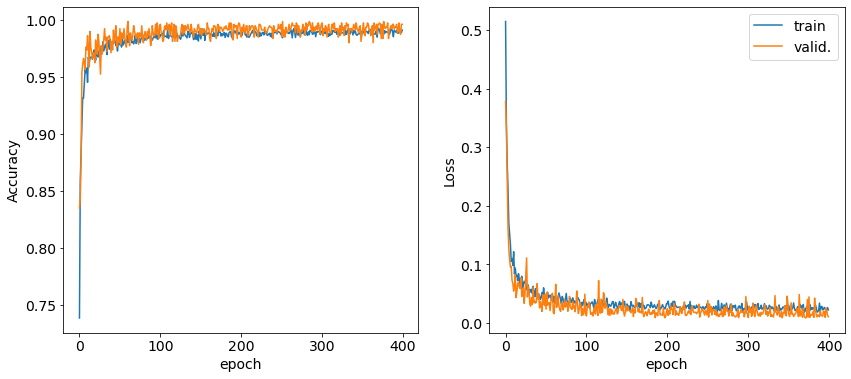

In [12]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_opt.history['accuracy'],label="train")
ax.plot(fit_opt.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_opt.history['loss'],label="train")
ax.plot(fit_opt.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('general.jpeg')  

In [13]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid2 = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid2[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid2))
print(grid2[-1])

# RESCALE

grid2_r = grid2/50

pred2 = model_opt.predict(grid2_r)

51 ****** 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

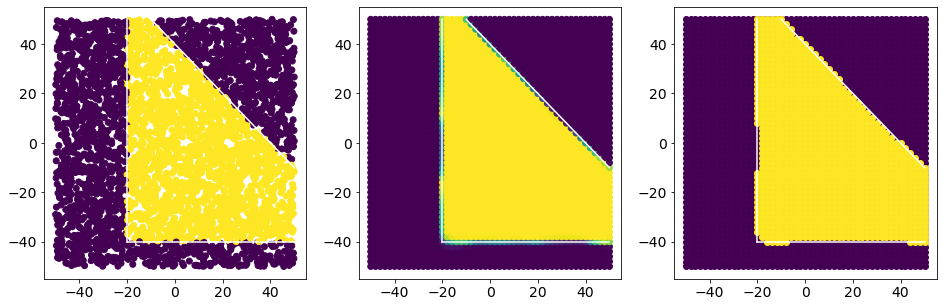

In [14]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid2[:,0],grid2[:,1],c=pred2)
boundaries()
ax=AX[2]
W1=np.where(pred2>0.5)[0] 
ax.scatter(grid2[:,0],grid2[:,1],c="#440154")
ax.scatter(grid2[W1,0],grid2[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [15]:
# evaluate model
score2 = model_opt.evaluate(x_valid, y_valid, verbose=2)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


Test loss: 0.010814358460484072
Test accuracy: 0.9962499737739563


## Model improvement

In [22]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))
def Rescale(x):
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200
Train: 3200 	 Validation: 800


In [6]:
# reproducibility
np.random.seed(12345)
#We define a model but not its parameters: they will be searched
CASE=1

if CASE==1:
    def create_DNN(layers1, activation, neurons_per_layer, dropout, optimizer,kernel_initializer):
        model =Sequential()
    
        model.add(Input(shape = (L,)))
        for i in range(0, layers1):
            model.add(Dense(neurons_per_layer, activation=activation))
        model.add(Dropout(dropout))
        model.add(Dense(1, activation='sigmoid')) #we make this choice because predictions are binary
        model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
        return model
    nepoch=400

In [8]:
# create the deep neural net
model1=create_DNN(5, 'selu', 42, 0.1,'Nadam','he_normal')

# train DNN and store training info in history
fit=model1.fit(x_train, y_train,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid, y_valid))

Epoch 1/400
64/64 - 2s - loss: 0.5190 - accuracy: 0.7419 - val_loss: 0.3618 - val_accuracy: 0.8900 - 2s/epoch - 35ms/step
Epoch 2/400
64/64 - 0s - loss: 0.2846 - accuracy: 0.8838 - val_loss: 0.2071 - val_accuracy: 0.9200 - 175ms/epoch - 3ms/step
Epoch 3/400
64/64 - 0s - loss: 0.1995 - accuracy: 0.9203 - val_loss: 0.1285 - val_accuracy: 0.9762 - 174ms/epoch - 3ms/step
Epoch 4/400
64/64 - 0s - loss: 0.1714 - accuracy: 0.9347 - val_loss: 0.1459 - val_accuracy: 0.9350 - 169ms/epoch - 3ms/step
Epoch 5/400
64/64 - 0s - loss: 0.1415 - accuracy: 0.9422 - val_loss: 0.1036 - val_accuracy: 0.9638 - 172ms/epoch - 3ms/step
Epoch 6/400
64/64 - 0s - loss: 0.1425 - accuracy: 0.9391 - val_loss: 0.1110 - val_accuracy: 0.9525 - 168ms/epoch - 3ms/step
Epoch 7/400
64/64 - 0s - loss: 0.1447 - accuracy: 0.9381 - val_loss: 0.2002 - val_accuracy: 0.9062 - 172ms/epoch - 3ms/step
Epoch 8/400
64/64 - 0s - loss: 0.1194 - accuracy: 0.9531 - val_loss: 0.1006 - val_accuracy: 0.9563 - 169ms/epoch - 3ms/step
Epoch 9/40

Epoch 67/400
64/64 - 0s - loss: 0.0482 - accuracy: 0.9797 - val_loss: 0.0260 - val_accuracy: 0.9925 - 161ms/epoch - 3ms/step
Epoch 68/400
64/64 - 0s - loss: 0.0409 - accuracy: 0.9819 - val_loss: 0.0409 - val_accuracy: 0.9812 - 145ms/epoch - 2ms/step
Epoch 69/400
64/64 - 0s - loss: 0.0453 - accuracy: 0.9812 - val_loss: 0.0386 - val_accuracy: 0.9825 - 154ms/epoch - 2ms/step
Epoch 70/400
64/64 - 0s - loss: 0.0511 - accuracy: 0.9775 - val_loss: 0.0184 - val_accuracy: 0.9950 - 152ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.0394 - accuracy: 0.9809 - val_loss: 0.0313 - val_accuracy: 0.9875 - 153ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.0449 - accuracy: 0.9803 - val_loss: 0.0386 - val_accuracy: 0.9862 - 143ms/epoch - 2ms/step
Epoch 73/400
64/64 - 0s - loss: 0.0484 - accuracy: 0.9787 - val_loss: 0.0289 - val_accuracy: 0.9887 - 156ms/epoch - 2ms/step
Epoch 74/400
64/64 - 0s - loss: 0.0391 - accuracy: 0.9834 - val_loss: 0.0404 - val_accuracy: 0.9812 - 147ms/epoch - 2ms/step


Epoch 133/400
64/64 - 0s - loss: 0.0352 - accuracy: 0.9844 - val_loss: 0.0230 - val_accuracy: 0.9887 - 147ms/epoch - 2ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0390 - accuracy: 0.9816 - val_loss: 0.0222 - val_accuracy: 0.9912 - 156ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0317 - accuracy: 0.9850 - val_loss: 0.0233 - val_accuracy: 0.9912 - 153ms/epoch - 2ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0325 - accuracy: 0.9853 - val_loss: 0.0247 - val_accuracy: 0.9900 - 155ms/epoch - 2ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0366 - accuracy: 0.9819 - val_loss: 0.0231 - val_accuracy: 0.9900 - 157ms/epoch - 2ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0339 - accuracy: 0.9859 - val_loss: 0.0196 - val_accuracy: 0.9937 - 157ms/epoch - 2ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0334 - accuracy: 0.9859 - val_loss: 0.0161 - val_accuracy: 0.9937 - 153ms/epoch - 2ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0307 - accuracy: 0.9878 - val_loss: 0.0255 - val_accuracy: 0.9900 - 155ms/epoch - 2

64/64 - 0s - loss: 0.0373 - accuracy: 0.9834 - val_loss: 0.0308 - val_accuracy: 0.9862 - 152ms/epoch - 2ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0308 - accuracy: 0.9887 - val_loss: 0.0147 - val_accuracy: 0.9937 - 162ms/epoch - 3ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0303 - accuracy: 0.9887 - val_loss: 0.0174 - val_accuracy: 0.9900 - 154ms/epoch - 2ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0263 - accuracy: 0.9900 - val_loss: 0.0208 - val_accuracy: 0.9900 - 158ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0291 - accuracy: 0.9862 - val_loss: 0.0209 - val_accuracy: 0.9925 - 162ms/epoch - 3ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0307 - accuracy: 0.9850 - val_loss: 0.0139 - val_accuracy: 0.9950 - 158ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0332 - accuracy: 0.9866 - val_loss: 0.0168 - val_accuracy: 0.9950 - 156ms/epoch - 2ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0296 - accuracy: 0.9884 - val_loss: 0.0212 - val_accuracy: 0.9900 - 154ms/epoch - 2ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.0293 - accuracy: 0.9884 - val_loss: 0.0137 - val_accuracy: 0.9962 - 150ms/epoch - 2ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0384 - accuracy: 0.9822 - val_loss: 0.0196 - val_accuracy: 0.9912 - 150ms/epoch - 2ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.0193 - val_accuracy: 0.9900 - 153ms/epoch - 2ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0272 - accuracy: 0.9881 - val_loss: 0.0330 - val_accuracy: 0.9862 - 153ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0204 - val_accuracy: 0.9925 - 156ms/epoch - 2ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0297 - accuracy: 0.9862 - val_loss: 0.0137 - val_accuracy: 0.9950 - 155ms/epoch - 2ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0120 - val_accuracy: 0.9975 - 156ms/epoch - 2ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0292 - accuracy: 0.9875 - val_loss: 0.0274 - val_accuracy: 0.9875 - 153ms/epoch - 2

64/64 - 0s - loss: 0.0332 - accuracy: 0.9841 - val_loss: 0.0172 - val_accuracy: 0.9937 - 155ms/epoch - 2ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0276 - accuracy: 0.9881 - val_loss: 0.0125 - val_accuracy: 0.9975 - 176ms/epoch - 3ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0234 - accuracy: 0.9894 - val_loss: 0.0303 - val_accuracy: 0.9887 - 220ms/epoch - 3ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0253 - accuracy: 0.9903 - val_loss: 0.0127 - val_accuracy: 0.9950 - 163ms/epoch - 3ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0295 - accuracy: 0.9859 - val_loss: 0.0149 - val_accuracy: 0.9912 - 222ms/epoch - 3ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0331 - accuracy: 0.9859 - val_loss: 0.0237 - val_accuracy: 0.9912 - 171ms/epoch - 3ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0275 - accuracy: 0.9872 - val_loss: 0.0188 - val_accuracy: 0.9950 - 157ms/epoch - 2ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0262 - accuracy: 0.9878 - val_loss: 0.0168 - val_accuracy: 0.9937 - 156ms/epoch - 2ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0242 - accuracy: 0.9906 - val_loss: 0.0145 - val_accuracy: 0.9950 - 174ms/epoch - 3ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0233 - accuracy: 0.9887 - val_loss: 0.0175 - val_accuracy: 0.9937 - 161ms/epoch - 3ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0278 - accuracy: 0.9884 - val_loss: 0.0184 - val_accuracy: 0.9950 - 160ms/epoch - 2ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0322 - accuracy: 0.9881 - val_loss: 0.0103 - val_accuracy: 0.9975 - 164ms/epoch - 3ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0220 - accuracy: 0.9900 - val_loss: 0.0128 - val_accuracy: 0.9962 - 162ms/epoch - 3ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0329 - accuracy: 0.9862 - val_loss: 0.0362 - val_accuracy: 0.9887 - 163ms/epoch - 3ms/step


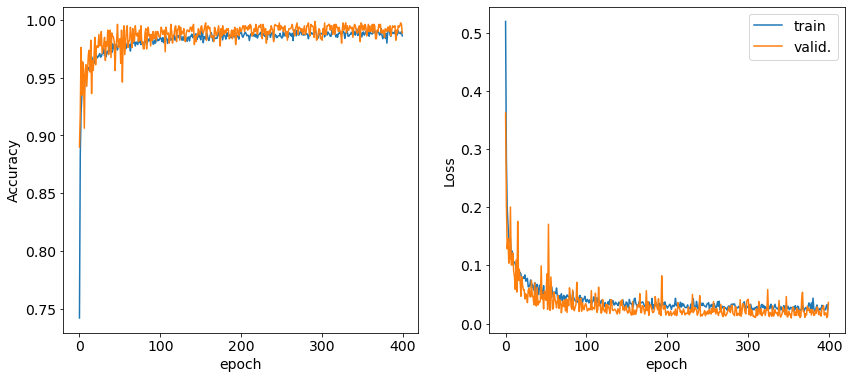

In [9]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('general.jpeg')  

In [13]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50
print(grid_r)

pred = model1.predict(grid_r)

51 ****** 2601
[50. 50.]
[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


<function matplotlib.pyplot.show(close=None, block=None)>

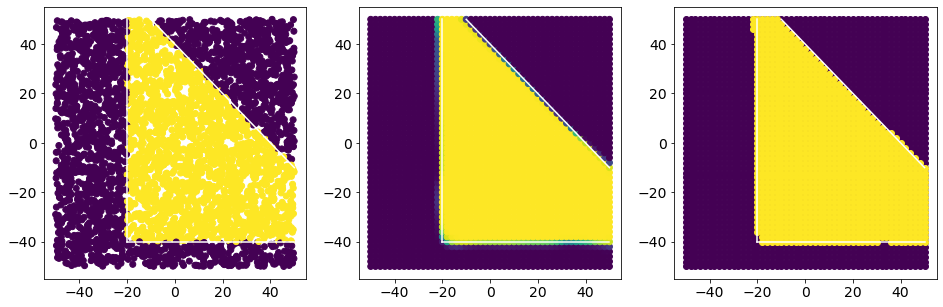

In [14]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [16]:
# evaluate model
score = model1.evaluate(x_valid, y_valid, verbose=2)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 - 0s - loss: 0.0362 - accuracy: 0.9887 - 219ms/epoch - 9ms/step

Test loss: 0.03624272719025612
Test accuracy: 0.9887499809265137


## Rescaling

In order to obtain an even higher accuracy, we try to rescale data using two different techniques. 

### 1: STANDARDIZATION

In [47]:
# training data
perc_train = 0.8 
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)
L = len(x[0])
N_train = int(perc_train * N)

(x_train_stan, y_train_stan) = (x[0:N_train],y[0:N_train])
(x_valid_stan, y_valid_stan) = (x[N_train:],y[N_train:])
print("Train:",len(x_train_stan),"\t Validation:",len(x_valid_stan))

Train: 3200 	 Validation: 800


In [48]:
scaler = preprocessing.StandardScaler().fit(x_train_stan)
x_train_stan = scaler.transform(x_train_stan)
scalerv = preprocessing.StandardScaler().fit(x_valid_stan)
x_valid_stan = scalerv.transform(x_valid_stan)

### Training

In [49]:
# create the deep neural net
model_stan=create_DNN1(5, 'selu', 30, 0.1,'Nadam','he_normal')

fit_stan=model_stan.fit(x_train_stan, y_train_stan,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_stan, y_valid_stan))

Train on 3200 samples, validate on 800 samples
Epoch 1/400
 - 1s - loss: 0.5041 - accuracy: 0.7500 - val_loss: 0.3653 - val_accuracy: 0.9050
Epoch 2/400
 - 0s - loss: 0.3150 - accuracy: 0.8681 - val_loss: 0.2501 - val_accuracy: 0.8988
Epoch 3/400
 - 0s - loss: 0.2262 - accuracy: 0.9059 - val_loss: 0.1551 - val_accuracy: 0.9400
Epoch 4/400
 - 0s - loss: 0.1772 - accuracy: 0.9241 - val_loss: 0.1416 - val_accuracy: 0.9413
Epoch 5/400
 - 0s - loss: 0.1661 - accuracy: 0.9256 - val_loss: 0.1296 - val_accuracy: 0.9463
Epoch 6/400
 - 0s - loss: 0.1396 - accuracy: 0.9388 - val_loss: 0.1090 - val_accuracy: 0.9475
Epoch 7/400
 - 0s - loss: 0.1166 - accuracy: 0.9503 - val_loss: 0.1087 - val_accuracy: 0.9550
Epoch 8/400
 - 0s - loss: 0.1105 - accuracy: 0.9541 - val_loss: 0.2028 - val_accuracy: 0.9000
Epoch 9/400
 - 0s - loss: 0.1032 - accuracy: 0.9566 - val_loss: 0.0701 - val_accuracy: 0.9737
Epoch 10/400
 - 0s - loss: 0.0956 - accuracy: 0.9603 - val_loss: 0.1139 - val_accuracy: 0.9450
Epoch 11/400

Epoch 87/400
 - 0s - loss: 0.0324 - accuracy: 0.9834 - val_loss: 0.0253 - val_accuracy: 0.9912
Epoch 88/400
 - 0s - loss: 0.0357 - accuracy: 0.9853 - val_loss: 0.0749 - val_accuracy: 0.9688
Epoch 89/400
 - 0s - loss: 0.0364 - accuracy: 0.9841 - val_loss: 0.0339 - val_accuracy: 0.9825
Epoch 90/400
 - 0s - loss: 0.0391 - accuracy: 0.9841 - val_loss: 0.0341 - val_accuracy: 0.9825
Epoch 91/400
 - 0s - loss: 0.0335 - accuracy: 0.9853 - val_loss: 0.1068 - val_accuracy: 0.9625
Epoch 92/400
 - 0s - loss: 0.0365 - accuracy: 0.9844 - val_loss: 0.0389 - val_accuracy: 0.9800
Epoch 93/400
 - 0s - loss: 0.0330 - accuracy: 0.9862 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 94/400
 - 0s - loss: 0.0312 - accuracy: 0.9872 - val_loss: 0.0297 - val_accuracy: 0.9837
Epoch 95/400
 - 0s - loss: 0.0335 - accuracy: 0.9837 - val_loss: 0.0562 - val_accuracy: 0.9812
Epoch 96/400
 - 0s - loss: 0.0415 - accuracy: 0.9834 - val_loss: 0.0298 - val_accuracy: 0.9850
Epoch 97/400
 - 0s - loss: 0.0343 - accuracy: 0.98

Epoch 173/400
 - 0s - loss: 0.0300 - accuracy: 0.9859 - val_loss: 0.0437 - val_accuracy: 0.9787
Epoch 174/400
 - 0s - loss: 0.0222 - accuracy: 0.9906 - val_loss: 0.0357 - val_accuracy: 0.9837
Epoch 175/400
 - 0s - loss: 0.0236 - accuracy: 0.9897 - val_loss: 0.0204 - val_accuracy: 0.9887
Epoch 176/400
 - 0s - loss: 0.0294 - accuracy: 0.9884 - val_loss: 0.0829 - val_accuracy: 0.9737
Epoch 177/400
 - 0s - loss: 0.0332 - accuracy: 0.9853 - val_loss: 0.0716 - val_accuracy: 0.9700
Epoch 178/400
 - 0s - loss: 0.0257 - accuracy: 0.9897 - val_loss: 0.0619 - val_accuracy: 0.9725
Epoch 179/400
 - 0s - loss: 0.0319 - accuracy: 0.9856 - val_loss: 0.0736 - val_accuracy: 0.9725
Epoch 180/400
 - 0s - loss: 0.0238 - accuracy: 0.9897 - val_loss: 0.0558 - val_accuracy: 0.9750
Epoch 181/400
 - 0s - loss: 0.0260 - accuracy: 0.9866 - val_loss: 0.0243 - val_accuracy: 0.9875
Epoch 182/400
 - 0s - loss: 0.0315 - accuracy: 0.9850 - val_loss: 0.0241 - val_accuracy: 0.9875
Epoch 183/400
 - 0s - loss: 0.0241 - acc

Epoch 259/400
 - 0s - loss: 0.0278 - accuracy: 0.9884 - val_loss: 0.0636 - val_accuracy: 0.9750
Epoch 260/400
 - 0s - loss: 0.0222 - accuracy: 0.9900 - val_loss: 0.0364 - val_accuracy: 0.9800
Epoch 261/400
 - 0s - loss: 0.0202 - accuracy: 0.9909 - val_loss: 0.0524 - val_accuracy: 0.9787
Epoch 262/400
 - 0s - loss: 0.0261 - accuracy: 0.9894 - val_loss: 0.0772 - val_accuracy: 0.9737
Epoch 263/400
 - 0s - loss: 0.0234 - accuracy: 0.9912 - val_loss: 0.0478 - val_accuracy: 0.9787
Epoch 264/400
 - 0s - loss: 0.0323 - accuracy: 0.9878 - val_loss: 0.0593 - val_accuracy: 0.9762
Epoch 265/400
 - 0s - loss: 0.0239 - accuracy: 0.9881 - val_loss: 0.0477 - val_accuracy: 0.9775
Epoch 266/400
 - 0s - loss: 0.0266 - accuracy: 0.9881 - val_loss: 0.0399 - val_accuracy: 0.9825
Epoch 267/400
 - 0s - loss: 0.0263 - accuracy: 0.9891 - val_loss: 0.0381 - val_accuracy: 0.9812
Epoch 268/400
 - 0s - loss: 0.0217 - accuracy: 0.9919 - val_loss: 0.0735 - val_accuracy: 0.9750
Epoch 269/400
 - 0s - loss: 0.0360 - acc

Epoch 345/400
 - 0s - loss: 0.0263 - accuracy: 0.9887 - val_loss: 0.0648 - val_accuracy: 0.9725
Epoch 346/400
 - 0s - loss: 0.0230 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9825
Epoch 347/400
 - 0s - loss: 0.0269 - accuracy: 0.9875 - val_loss: 0.0430 - val_accuracy: 0.9812
Epoch 348/400
 - 0s - loss: 0.0256 - accuracy: 0.9900 - val_loss: 0.0543 - val_accuracy: 0.9787
Epoch 349/400
 - 0s - loss: 0.0293 - accuracy: 0.9872 - val_loss: 0.0253 - val_accuracy: 0.9900
Epoch 350/400
 - 0s - loss: 0.0274 - accuracy: 0.9891 - val_loss: 0.0348 - val_accuracy: 0.9812
Epoch 351/400
 - 0s - loss: 0.0242 - accuracy: 0.9906 - val_loss: 0.0526 - val_accuracy: 0.9787
Epoch 352/400
 - 0s - loss: 0.0215 - accuracy: 0.9897 - val_loss: 0.0393 - val_accuracy: 0.9837
Epoch 353/400
 - 0s - loss: 0.0195 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9887
Epoch 354/400
 - 0s - loss: 0.0281 - accuracy: 0.9887 - val_loss: 0.0284 - val_accuracy: 0.9875
Epoch 355/400
 - 0s - loss: 0.0178 - acc

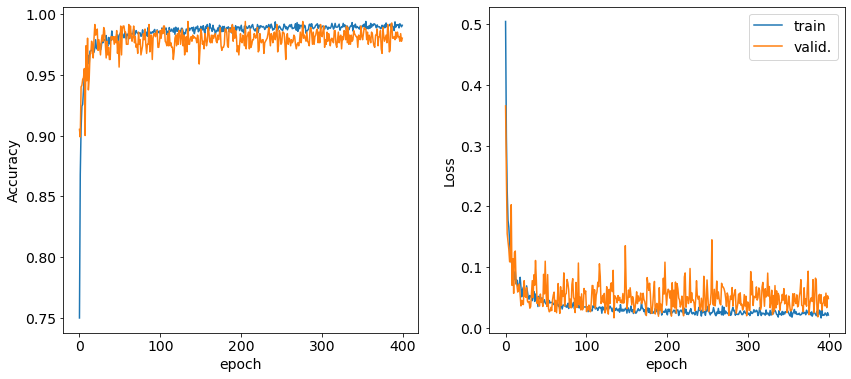

In [50]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_stan.history['accuracy'],label="train")
ax.plot(fit_stan.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_stan.history['loss'],label="train")
ax.plot(fit_stan.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

It is already clear that the standardization hasn't improved our data, on the contrary, it worsened the accuracy.

In [51]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

scaler3 = preprocessing.StandardScaler().fit(grid)
grid_r = scaler3.transform(grid)
print(grid_r)

pred3 = model_stan.predict(grid_r)

51 ****** 2601
[50. 50.]
[[-1.69841555 -1.69841555]
 [-1.63047893 -1.69841555]
 [-1.56254231 -1.69841555]
 ...
 [ 1.56254231  1.69841555]
 [ 1.63047893  1.69841555]
 [ 1.69841555  1.69841555]]


<function matplotlib.pyplot.show(close=None, block=None)>

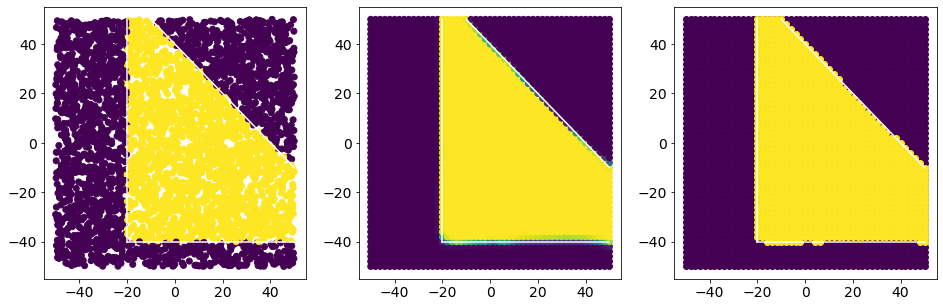

In [52]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred3)
boundaries()
ax=AX[2]
W1=np.where(pred3>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [53]:
# evaluate model
score3 = model_stan.evaluate(x_valid_stan, y_valid_stan, verbose=2)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])


Test loss: 0.04844361500145169
Test accuracy: 0.9800000190734863


In conclusion, standardization of data caused loss of accuracy.

### 2: SCALING IN A RANGE

In [54]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)
L = len(x[0])
N_train = int(perc_train * N)

(x_train_mm, y_train_mm) = (x[0:N_train],y[0:N_train])
(x_valid_mm, y_valid_mm) = (x[N_train:],y[N_train:])
print("Train:",len(x_train_mm),"\t Validation:",len(x_valid_mm))

Train: 3200 	 Validation: 800


In [55]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_mm = min_max_scaler.fit_transform(x_train_mm)
min_max_scalerm = preprocessing.MinMaxScaler()
x_valid_mm = min_max_scalerm.fit_transform(x_valid_mm)

### Training

In [56]:
# create the deep neural net
model_mm=create_DNN1(5, 'selu', 30, 0.2,'Nadam','he_normal')

# train DNN and store training info in history
fit_mm=model_mm.fit(x_train_mm, y_train_mm,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_mm, y_valid_mm))

Train on 3200 samples, validate on 800 samples
Epoch 1/400
 - 1s - loss: 0.5908 - accuracy: 0.6844 - val_loss: 0.6075 - val_accuracy: 0.7250
Epoch 2/400
 - 0s - loss: 0.4940 - accuracy: 0.7650 - val_loss: 0.4060 - val_accuracy: 0.8275
Epoch 3/400
 - 0s - loss: 0.3740 - accuracy: 0.8338 - val_loss: 0.2521 - val_accuracy: 0.9425
Epoch 4/400
 - 0s - loss: 0.2534 - accuracy: 0.8997 - val_loss: 0.1716 - val_accuracy: 0.9337
Epoch 5/400
 - 0s - loss: 0.2200 - accuracy: 0.9084 - val_loss: 0.1791 - val_accuracy: 0.9125
Epoch 6/400
 - 0s - loss: 0.1774 - accuracy: 0.9294 - val_loss: 0.1093 - val_accuracy: 0.9688
Epoch 7/400
 - 0s - loss: 0.1580 - accuracy: 0.9337 - val_loss: 0.1138 - val_accuracy: 0.9525
Epoch 8/400
 - 0s - loss: 0.1464 - accuracy: 0.9409 - val_loss: 0.0999 - val_accuracy: 0.9688
Epoch 9/400
 - 0s - loss: 0.1162 - accuracy: 0.9531 - val_loss: 0.0954 - val_accuracy: 0.9600
Epoch 10/400
 - 0s - loss: 0.1264 - accuracy: 0.9481 - val_loss: 0.0928 - val_accuracy: 0.9563
Epoch 11/400

Epoch 87/400
 - 0s - loss: 0.0323 - accuracy: 0.9866 - val_loss: 0.0204 - val_accuracy: 0.9950
Epoch 88/400
 - 0s - loss: 0.0414 - accuracy: 0.9844 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 89/400
 - 0s - loss: 0.0339 - accuracy: 0.9862 - val_loss: 0.0258 - val_accuracy: 0.9912
Epoch 90/400
 - 0s - loss: 0.0351 - accuracy: 0.9831 - val_loss: 0.0158 - val_accuracy: 0.9975
Epoch 91/400
 - 0s - loss: 0.0304 - accuracy: 0.9869 - val_loss: 0.0222 - val_accuracy: 0.9887
Epoch 92/400
 - 0s - loss: 0.0391 - accuracy: 0.9834 - val_loss: 0.0146 - val_accuracy: 0.9962
Epoch 93/400
 - 0s - loss: 0.0282 - accuracy: 0.9881 - val_loss: 0.0305 - val_accuracy: 0.9875
Epoch 94/400
 - 0s - loss: 0.0373 - accuracy: 0.9856 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 95/400
 - 0s - loss: 0.0344 - accuracy: 0.9856 - val_loss: 0.0219 - val_accuracy: 0.9900
Epoch 96/400
 - 0s - loss: 0.0335 - accuracy: 0.9866 - val_loss: 0.0245 - val_accuracy: 0.9900
Epoch 97/400
 - 0s - loss: 0.0357 - accuracy: 0.98

Epoch 173/400
 - 0s - loss: 0.0257 - accuracy: 0.9887 - val_loss: 0.0193 - val_accuracy: 0.9962
Epoch 174/400
 - 0s - loss: 0.0251 - accuracy: 0.9906 - val_loss: 0.0205 - val_accuracy: 0.9900
Epoch 175/400
 - 0s - loss: 0.0198 - accuracy: 0.9919 - val_loss: 0.0216 - val_accuracy: 0.9912
Epoch 176/400
 - 0s - loss: 0.0310 - accuracy: 0.9878 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 177/400
 - 0s - loss: 0.0241 - accuracy: 0.9909 - val_loss: 0.0093 - val_accuracy: 0.9987
Epoch 178/400
 - 0s - loss: 0.0290 - accuracy: 0.9887 - val_loss: 0.0191 - val_accuracy: 0.9937
Epoch 179/400
 - 0s - loss: 0.0227 - accuracy: 0.9900 - val_loss: 0.0275 - val_accuracy: 0.9925
Epoch 180/400
 - 0s - loss: 0.0290 - accuracy: 0.9881 - val_loss: 0.0161 - val_accuracy: 0.9937
Epoch 181/400
 - 0s - loss: 0.0257 - accuracy: 0.9875 - val_loss: 0.0346 - val_accuracy: 0.9862
Epoch 182/400
 - 0s - loss: 0.0268 - accuracy: 0.9869 - val_loss: 0.0220 - val_accuracy: 0.9937
Epoch 183/400
 - 0s - loss: 0.0333 - acc

Epoch 259/400
 - 0s - loss: 0.0197 - accuracy: 0.9916 - val_loss: 0.0179 - val_accuracy: 0.9900
Epoch 260/400
 - 0s - loss: 0.0277 - accuracy: 0.9887 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 261/400
 - 0s - loss: 0.0213 - accuracy: 0.9925 - val_loss: 0.0109 - val_accuracy: 0.9962
Epoch 262/400
 - 0s - loss: 0.0175 - accuracy: 0.9931 - val_loss: 0.0098 - val_accuracy: 0.9962
Epoch 263/400
 - 0s - loss: 0.0225 - accuracy: 0.9894 - val_loss: 0.0143 - val_accuracy: 0.9937
Epoch 264/400
 - 0s - loss: 0.0190 - accuracy: 0.9928 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 265/400
 - 0s - loss: 0.0377 - accuracy: 0.9866 - val_loss: 0.0104 - val_accuracy: 0.9962
Epoch 266/400
 - 0s - loss: 0.0251 - accuracy: 0.9884 - val_loss: 0.0112 - val_accuracy: 0.9962
Epoch 267/400
 - 0s - loss: 0.0187 - accuracy: 0.9919 - val_loss: 0.0108 - val_accuracy: 0.9975
Epoch 268/400
 - 0s - loss: 0.0242 - accuracy: 0.9903 - val_loss: 0.0076 - val_accuracy: 0.9975
Epoch 269/400
 - 0s - loss: 0.0177 - acc

Epoch 345/400
 - 0s - loss: 0.0171 - accuracy: 0.9934 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 346/400
 - 0s - loss: 0.0212 - accuracy: 0.9916 - val_loss: 0.0111 - val_accuracy: 0.9962
Epoch 347/400
 - 0s - loss: 0.0230 - accuracy: 0.9903 - val_loss: 0.0075 - val_accuracy: 0.9975
Epoch 348/400
 - 0s - loss: 0.0161 - accuracy: 0.9922 - val_loss: 0.0234 - val_accuracy: 0.9887
Epoch 349/400
 - 0s - loss: 0.0204 - accuracy: 0.9919 - val_loss: 0.0171 - val_accuracy: 0.9937
Epoch 350/400
 - 0s - loss: 0.0185 - accuracy: 0.9909 - val_loss: 0.0116 - val_accuracy: 0.9950
Epoch 351/400
 - 0s - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0193 - val_accuracy: 0.9912
Epoch 352/400
 - 0s - loss: 0.0297 - accuracy: 0.9872 - val_loss: 0.0149 - val_accuracy: 0.9912
Epoch 353/400
 - 0s - loss: 0.0193 - accuracy: 0.9919 - val_loss: 0.0138 - val_accuracy: 0.9937
Epoch 354/400
 - 0s - loss: 0.0178 - accuracy: 0.9919 - val_loss: 0.0105 - val_accuracy: 0.9975
Epoch 355/400
 - 0s - loss: 0.0198 - acc

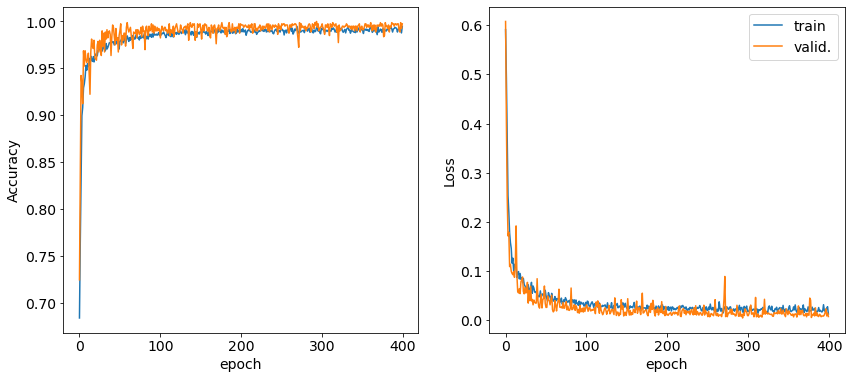

In [57]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_mm.history['accuracy'],label="train")
ax.plot(fit_mm.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_mm.history['loss'],label="train")
ax.plot(fit_mm.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [58]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE
min_max_scaler = preprocessing.MinMaxScaler()
grid_r = min_max_scaler.fit_transform(grid)

print(grid_r)

pred4 = model_mm.predict(grid_r)

51 ****** 2601
[50. 50.]
[[0.   0.  ]
 [0.02 0.  ]
 [0.04 0.  ]
 ...
 [0.96 1.  ]
 [0.98 1.  ]
 [1.   1.  ]]


<function matplotlib.pyplot.show(close=None, block=None)>

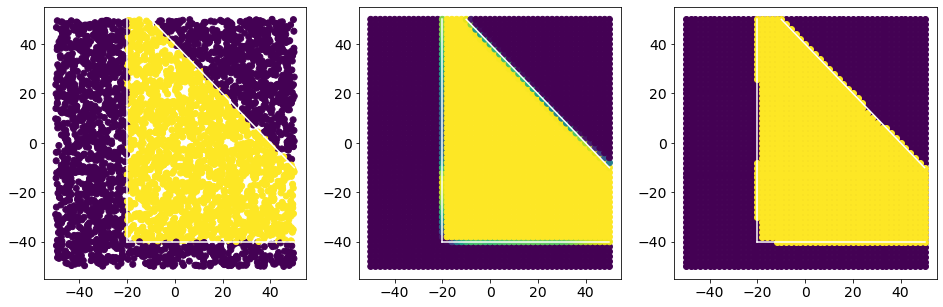

In [59]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred4)
boundaries()
ax=AX[2]
W1=np.where(pred4>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('best1.jpeg')  

In [60]:
# evaluate model
score4 = model_mm.evaluate(x_valid_mm, y_valid_mm, verbose=2)

# print performance
print()
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])


Test loss: 0.007756246578937862
Test accuracy: 0.9975000023841858


Scaling data in a range has increased the accuracy of the model.

**--** **--** **--** **--** **--** **--**  

## REDUCTION OF DATA

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 400
train: 320


<function matplotlib.pyplot.show(close=None, block=None)>

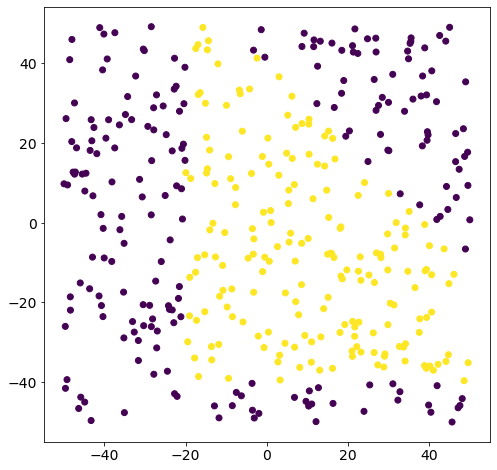

In [18]:
TYPE=1
x_red = np.loadtxt(filename_red("data",TYPE), delimiter=' ')
y_red = np.loadtxt(filename_red("labels",TYPE), delimiter=' ')
N_red = len(x_red)

# dim. of a sample
L = len(x_red[0])
print(L)

for i in range(10):
    print(x_red[i],y_red[i])

N_train_red = int(perc_train * N_red)
print(f'data: {N_red}\ntrain: {N_train_red}')

plt.figure(figsize = (8,8))
plt.scatter(x_red[:,0],x_red[:,1],c=y_red) #tutte le righe della colonna 0, tutte le righe della colonna 1
plt.show

### split in train and test set

In [19]:
(x_train_red, y_train_red) = (x_red[0:N_train_red],y_red[0:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 320 	 Validation: 80


### Rescale of data

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_red = min_max_scaler.fit_transform(x_train_red)
min_max_scalerv = preprocessing.MinMaxScaler()
x_valid_red = min_max_scalerv.fit_transform(x_valid_red)

### Training of model

In [21]:
# create the deep neural net
model_red=create_DNN1(5, 'selu', 30, 0.1,'Nadam','he_normal') #best parameters for now


# train DNN and store training info in history
fit_red=model_red.fit(x_train_red, y_train_red,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_red, y_valid_red))

Train on 320 samples, validate on 80 samples
Epoch 1/400
 - 1s - loss: 0.7090 - accuracy: 0.5656 - val_loss: 0.6668 - val_accuracy: 0.5625
Epoch 2/400
 - 0s - loss: 0.7007 - accuracy: 0.5656 - val_loss: 0.6421 - val_accuracy: 0.6000
Epoch 3/400
 - 0s - loss: 0.6767 - accuracy: 0.5844 - val_loss: 0.6436 - val_accuracy: 0.6625
Epoch 4/400
 - 0s - loss: 0.6487 - accuracy: 0.6344 - val_loss: 0.6234 - val_accuracy: 0.6625
Epoch 5/400
 - 0s - loss: 0.6267 - accuracy: 0.6062 - val_loss: 0.6010 - val_accuracy: 0.7000
Epoch 6/400
 - 0s - loss: 0.6039 - accuracy: 0.6625 - val_loss: 0.5923 - val_accuracy: 0.7250
Epoch 7/400
 - 0s - loss: 0.6177 - accuracy: 0.6500 - val_loss: 0.5879 - val_accuracy: 0.7375
Epoch 8/400
 - 0s - loss: 0.6548 - accuracy: 0.6562 - val_loss: 0.6241 - val_accuracy: 0.6500
Epoch 9/400
 - 0s - loss: 0.5953 - accuracy: 0.7063 - val_loss: 0.5847 - val_accuracy: 0.6250
Epoch 10/400
 - 0s - loss: 0.5980 - accuracy: 0.6781 - val_loss: 0.5638 - val_accuracy: 0.6625
Epoch 11/400
 

Epoch 87/400
 - 0s - loss: 0.2789 - accuracy: 0.8750 - val_loss: 0.2137 - val_accuracy: 0.9250
Epoch 88/400
 - 0s - loss: 0.2800 - accuracy: 0.8719 - val_loss: 0.2191 - val_accuracy: 0.8875
Epoch 89/400
 - 0s - loss: 0.2835 - accuracy: 0.8625 - val_loss: 0.2467 - val_accuracy: 0.9125
Epoch 90/400
 - 0s - loss: 0.2888 - accuracy: 0.8562 - val_loss: 0.1918 - val_accuracy: 0.9375
Epoch 91/400
 - 0s - loss: 0.2646 - accuracy: 0.8813 - val_loss: 0.1740 - val_accuracy: 0.9250
Epoch 92/400
 - 0s - loss: 0.2202 - accuracy: 0.9156 - val_loss: 0.1726 - val_accuracy: 0.9500
Epoch 93/400
 - 0s - loss: 0.2483 - accuracy: 0.9062 - val_loss: 0.1773 - val_accuracy: 0.9250
Epoch 94/400
 - 0s - loss: 0.2290 - accuracy: 0.9062 - val_loss: 0.5149 - val_accuracy: 0.8000
Epoch 95/400
 - 0s - loss: 0.2591 - accuracy: 0.8875 - val_loss: 0.1741 - val_accuracy: 0.9375
Epoch 96/400
 - 0s - loss: 0.2320 - accuracy: 0.9187 - val_loss: 0.1953 - val_accuracy: 0.9375
Epoch 97/400
 - 0s - loss: 0.2176 - accuracy: 0.92

Epoch 173/400
 - 0s - loss: 0.1106 - accuracy: 0.9531 - val_loss: 0.1153 - val_accuracy: 0.9500
Epoch 174/400
 - 0s - loss: 0.1236 - accuracy: 0.9469 - val_loss: 0.2138 - val_accuracy: 0.8750
Epoch 175/400
 - 0s - loss: 0.1990 - accuracy: 0.9062 - val_loss: 0.0688 - val_accuracy: 0.9875
Epoch 176/400
 - 0s - loss: 0.1170 - accuracy: 0.9531 - val_loss: 0.0646 - val_accuracy: 0.9750
Epoch 177/400
 - 0s - loss: 0.0874 - accuracy: 0.9719 - val_loss: 0.0851 - val_accuracy: 0.9750
Epoch 178/400
 - 0s - loss: 0.0989 - accuracy: 0.9656 - val_loss: 0.1376 - val_accuracy: 0.9500
Epoch 179/400
 - 0s - loss: 0.1027 - accuracy: 0.9531 - val_loss: 0.1126 - val_accuracy: 0.9500
Epoch 180/400
 - 0s - loss: 0.1381 - accuracy: 0.9406 - val_loss: 0.1170 - val_accuracy: 0.9625
Epoch 181/400
 - 0s - loss: 0.1171 - accuracy: 0.9500 - val_loss: 0.0939 - val_accuracy: 0.9750
Epoch 182/400
 - 0s - loss: 0.1200 - accuracy: 0.9438 - val_loss: 0.1371 - val_accuracy: 0.9625
Epoch 183/400
 - 0s - loss: 0.1056 - acc

Epoch 259/400
 - 0s - loss: 0.0615 - accuracy: 0.9656 - val_loss: 0.4628 - val_accuracy: 0.8625
Epoch 260/400
 - 0s - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 261/400
 - 0s - loss: 0.0628 - accuracy: 0.9750 - val_loss: 0.0636 - val_accuracy: 0.9875
Epoch 262/400
 - 0s - loss: 0.0475 - accuracy: 0.9812 - val_loss: 0.0897 - val_accuracy: 0.9625
Epoch 263/400
 - 0s - loss: 0.0816 - accuracy: 0.9688 - val_loss: 0.0789 - val_accuracy: 0.9625
Epoch 264/400
 - 0s - loss: 0.0538 - accuracy: 0.9750 - val_loss: 0.0656 - val_accuracy: 0.9625
Epoch 265/400
 - 0s - loss: 0.0909 - accuracy: 0.9625 - val_loss: 0.0565 - val_accuracy: 0.9750
Epoch 266/400
 - 0s - loss: 0.0605 - accuracy: 0.9750 - val_loss: 0.3502 - val_accuracy: 0.8875
Epoch 267/400
 - 0s - loss: 0.1173 - accuracy: 0.9531 - val_loss: 0.1577 - val_accuracy: 0.9625
Epoch 268/400
 - 0s - loss: 0.0894 - accuracy: 0.9688 - val_loss: 0.0511 - val_accuracy: 0.9875
Epoch 269/400
 - 0s - loss: 0.0638 - acc

Epoch 345/400
 - 0s - loss: 0.0305 - accuracy: 0.9969 - val_loss: 0.0582 - val_accuracy: 0.9875
Epoch 346/400
 - 0s - loss: 0.0662 - accuracy: 0.9688 - val_loss: 0.0592 - val_accuracy: 0.9625
Epoch 347/400
 - 0s - loss: 0.0429 - accuracy: 0.9844 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 348/400
 - 0s - loss: 0.0531 - accuracy: 0.9812 - val_loss: 0.0844 - val_accuracy: 0.9625
Epoch 349/400
 - 0s - loss: 0.0452 - accuracy: 0.9781 - val_loss: 0.0824 - val_accuracy: 0.9750
Epoch 350/400
 - 0s - loss: 0.0388 - accuracy: 0.9844 - val_loss: 0.0650 - val_accuracy: 0.9625
Epoch 351/400
 - 0s - loss: 0.1061 - accuracy: 0.9563 - val_loss: 0.1221 - val_accuracy: 0.9750
Epoch 352/400
 - 0s - loss: 0.0749 - accuracy: 0.9656 - val_loss: 0.0837 - val_accuracy: 0.9625
Epoch 353/400
 - 0s - loss: 0.0637 - accuracy: 0.9625 - val_loss: 0.0437 - val_accuracy: 0.9750
Epoch 354/400
 - 0s - loss: 0.0617 - accuracy: 0.9719 - val_loss: 0.0600 - val_accuracy: 0.9750
Epoch 355/400
 - 0s - loss: 0.0420 - acc

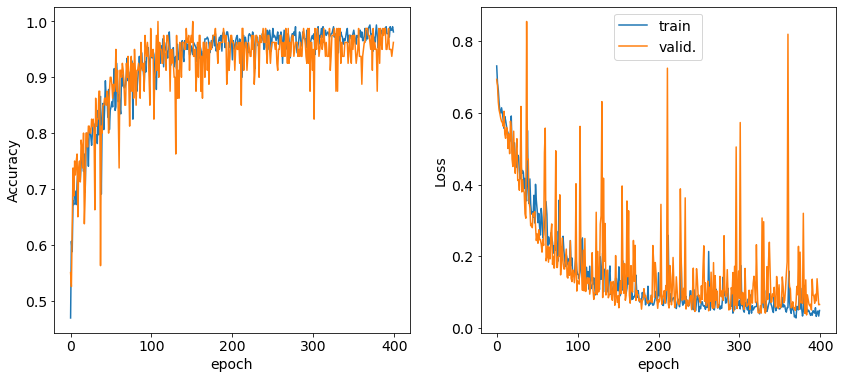

In [44]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_red.history['accuracy'],label="train")
ax.plot(fit_red.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_red.history['loss'],label="train")
ax.plot(fit_red.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [211]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

min_max_scalerr = preprocessing.MinMaxScaler()
grid_r = min_max_scalerr.fit_transform(grid)

pred5 = model_red.predict(grid_r)

51 ****** 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

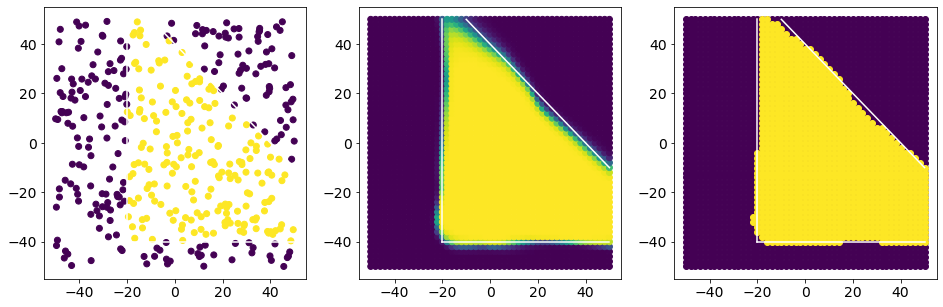

In [46]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred5)
boundaries()
ax=AX[2]
W1=np.where(pred5>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [47]:
# evaluate model
score5 = model_red.evaluate(x_valid_red, y_valid_red, verbose=2)

# print performance
print()
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])


Test loss: 0.06554566621780396
Test accuracy: 0.9624999761581421


## INCREMENTATION OF DATA


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 10000
train: 8000


<function matplotlib.pyplot.show(close=None, block=None)>

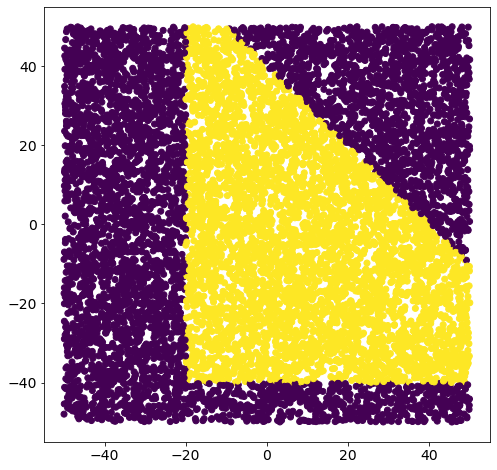

In [214]:
TYPE=1
x_incr = np.loadtxt(filename_incr("data",TYPE), delimiter=' ')
y_incr = np.loadtxt(filename_incr("labels",TYPE), delimiter=' ')
N_incr = len(x_incr)

# dim. of a sample
L = len(x_incr[0])
print(L)

for i in range(10):
    print(x_incr[i],y_incr[i])

N_train_incr = int(perc_train * N_incr)
print(f'data: {N_incr}\ntrain: {N_train_incr}')

plt.figure(figsize = (8,8))
plt.scatter(x_incr[:,0],x_incr[:,1],c=y_incr) #tutte le righe della colonna 0, tutte le righe della colonna 1
plt.show

### split in train and test set

In [215]:
(x_train_incr, y_train_incr) = (x_incr[0:N_train_incr],y_incr[0:N_train_incr])
(x_valid_incr, y_valid_incr) = (x_incr[N_train_incr:],y_incr[N_train_incr:])
print("Train:",len(x_train_incr),"\t Validation:",len(x_valid_incr))

Train: 8000 	 Validation: 2000


### Rescale of data

In [199]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_incr = min_max_scaler.fit_transform(x_train_incr)
min_max_scaleri = preprocessing.MinMaxScaler()
x_valid_incr = min_max_scaleri.fit_transform(x_valid_incr)

### Training of model

In [59]:
# create the deep neural net
model_incr=create_DNN1(5, 'selu', 30, 0.1,'Nadam','he_normal') #best parameters for now

# train DNN and store training info in history
fit_incr=model_incr.fit(x_train_incr, y_train_incr,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_incr, y_valid_incr))

Train on 8000 samples, validate on 2000 samples
Epoch 1/400
 - 2s - loss: 0.5587 - accuracy: 0.6774 - val_loss: 0.4421 - val_accuracy: 0.7650
Epoch 2/400
 - 1s - loss: 0.4345 - accuracy: 0.7785 - val_loss: 0.4112 - val_accuracy: 0.7870
Epoch 3/400
 - 1s - loss: 0.4166 - accuracy: 0.7843 - val_loss: 0.4271 - val_accuracy: 0.7765
Epoch 4/400
 - 1s - loss: 0.4051 - accuracy: 0.7872 - val_loss: 0.3949 - val_accuracy: 0.7920
Epoch 5/400
 - 1s - loss: 0.3858 - accuracy: 0.8075 - val_loss: 0.4285 - val_accuracy: 0.7540
Epoch 6/400
 - 1s - loss: 0.3473 - accuracy: 0.8250 - val_loss: 0.2660 - val_accuracy: 0.8855
Epoch 7/400
 - 1s - loss: 0.2354 - accuracy: 0.9007 - val_loss: 0.1673 - val_accuracy: 0.9365
Epoch 8/400
 - 1s - loss: 0.1792 - accuracy: 0.9286 - val_loss: 0.1323 - val_accuracy: 0.9425
Epoch 9/400
 - 1s - loss: 0.1407 - accuracy: 0.9414 - val_loss: 0.1144 - val_accuracy: 0.9525
Epoch 10/400
 - 1s - loss: 0.1154 - accuracy: 0.9520 - val_loss: 0.0988 - val_accuracy: 0.9555
Epoch 11/40

Epoch 87/400
 - 1s - loss: 0.0339 - accuracy: 0.9851 - val_loss: 0.0293 - val_accuracy: 0.9885
Epoch 88/400
 - 1s - loss: 0.0307 - accuracy: 0.9862 - val_loss: 0.0330 - val_accuracy: 0.9885
Epoch 89/400
 - 1s - loss: 0.0296 - accuracy: 0.9877 - val_loss: 0.0221 - val_accuracy: 0.9940
Epoch 90/400
 - 1s - loss: 0.0361 - accuracy: 0.9846 - val_loss: 0.0332 - val_accuracy: 0.9860
Epoch 91/400
 - 1s - loss: 0.0248 - accuracy: 0.9890 - val_loss: 0.0309 - val_accuracy: 0.9875
Epoch 92/400
 - 1s - loss: 0.0300 - accuracy: 0.9865 - val_loss: 0.0409 - val_accuracy: 0.9825
Epoch 93/400
 - 1s - loss: 0.0307 - accuracy: 0.9876 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 94/400
 - 1s - loss: 0.0307 - accuracy: 0.9860 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 95/400
 - 1s - loss: 0.0333 - accuracy: 0.9855 - val_loss: 0.0372 - val_accuracy: 0.9840
Epoch 96/400
 - 1s - loss: 0.0290 - accuracy: 0.9865 - val_loss: 0.0367 - val_accuracy: 0.9850
Epoch 97/400
 - 1s - loss: 0.0273 - accuracy: 0.98

Epoch 173/400
 - 1s - loss: 0.0280 - accuracy: 0.9868 - val_loss: 0.0181 - val_accuracy: 0.9930
Epoch 174/400
 - 1s - loss: 0.0231 - accuracy: 0.9909 - val_loss: 0.0243 - val_accuracy: 0.9900
Epoch 175/400
 - 1s - loss: 0.0265 - accuracy: 0.9887 - val_loss: 0.0203 - val_accuracy: 0.9905
Epoch 176/400
 - 1s - loss: 0.0282 - accuracy: 0.9883 - val_loss: 0.0345 - val_accuracy: 0.9830
Epoch 177/400
 - 1s - loss: 0.0288 - accuracy: 0.9876 - val_loss: 0.0196 - val_accuracy: 0.9925
Epoch 178/400
 - 1s - loss: 0.0275 - accuracy: 0.9891 - val_loss: 0.0217 - val_accuracy: 0.9905
Epoch 179/400
 - 1s - loss: 0.0265 - accuracy: 0.9887 - val_loss: 0.0245 - val_accuracy: 0.9870
Epoch 180/400
 - 1s - loss: 0.0225 - accuracy: 0.9906 - val_loss: 0.0191 - val_accuracy: 0.9925
Epoch 181/400
 - 1s - loss: 0.0242 - accuracy: 0.9902 - val_loss: 0.0189 - val_accuracy: 0.9900
Epoch 182/400
 - 1s - loss: 0.0245 - accuracy: 0.9887 - val_loss: 0.0170 - val_accuracy: 0.9965
Epoch 183/400
 - 1s - loss: 0.0318 - acc

Epoch 259/400
 - 1s - loss: 0.0221 - accuracy: 0.9916 - val_loss: 0.0180 - val_accuracy: 0.9930
Epoch 260/400
 - 1s - loss: 0.0228 - accuracy: 0.9896 - val_loss: 0.0154 - val_accuracy: 0.9930
Epoch 261/400
 - 1s - loss: 0.0217 - accuracy: 0.9908 - val_loss: 0.0163 - val_accuracy: 0.9950
Epoch 262/400
 - 1s - loss: 0.0226 - accuracy: 0.9909 - val_loss: 0.0367 - val_accuracy: 0.9815
Epoch 263/400
 - 1s - loss: 0.0280 - accuracy: 0.9887 - val_loss: 0.0221 - val_accuracy: 0.9880
Epoch 264/400
 - 1s - loss: 0.0234 - accuracy: 0.9899 - val_loss: 0.0278 - val_accuracy: 0.9875
Epoch 265/400
 - 1s - loss: 0.0222 - accuracy: 0.9915 - val_loss: 0.0275 - val_accuracy: 0.9880
Epoch 266/400
 - 1s - loss: 0.0228 - accuracy: 0.9909 - val_loss: 0.0220 - val_accuracy: 0.9915
Epoch 267/400
 - 1s - loss: 0.0224 - accuracy: 0.9899 - val_loss: 0.0239 - val_accuracy: 0.9875
Epoch 268/400
 - 1s - loss: 0.0260 - accuracy: 0.9894 - val_loss: 0.0226 - val_accuracy: 0.9890
Epoch 269/400
 - 1s - loss: 0.0197 - acc

Epoch 345/400
 - 1s - loss: 0.0214 - accuracy: 0.9901 - val_loss: 0.0519 - val_accuracy: 0.9785
Epoch 346/400
 - 1s - loss: 0.0269 - accuracy: 0.9885 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 347/400
 - 1s - loss: 0.0185 - accuracy: 0.9925 - val_loss: 0.1147 - val_accuracy: 0.9675
Epoch 348/400
 - 1s - loss: 0.0257 - accuracy: 0.9908 - val_loss: 0.0190 - val_accuracy: 0.9920
Epoch 349/400
 - 1s - loss: 0.0212 - accuracy: 0.9912 - val_loss: 0.0168 - val_accuracy: 0.9920
Epoch 350/400
 - 1s - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 351/400
 - 1s - loss: 0.0242 - accuracy: 0.9895 - val_loss: 0.0389 - val_accuracy: 0.9830
Epoch 352/400
 - 1s - loss: 0.0223 - accuracy: 0.9918 - val_loss: 0.0198 - val_accuracy: 0.9905
Epoch 353/400
 - 1s - loss: 0.0197 - accuracy: 0.9914 - val_loss: 0.0403 - val_accuracy: 0.9835
Epoch 354/400
 - 1s - loss: 0.0228 - accuracy: 0.9895 - val_loss: 0.0259 - val_accuracy: 0.9870
Epoch 355/400
 - 1s - loss: 0.0242 - acc

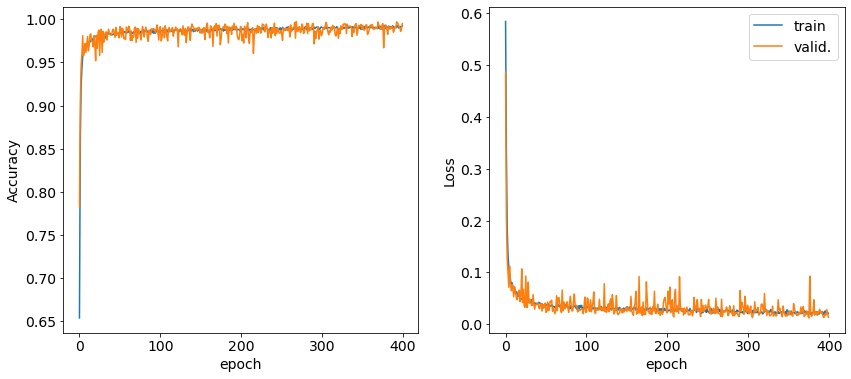

In [52]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_incr.history['accuracy'],label="train")
ax.plot(fit_incr.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_incr.history['loss'],label="train")
ax.plot(fit_incr.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [219]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

min_max_scalerk = preprocessing.MinMaxScaler()
grid_r = min_max_scalerk.fit_transform(grid)
print(grid_r)

pred6 = model_incr.predict(grid_r)

51 ****** 2601
[50. 50.]
[[0.   0.  ]
 [0.02 0.  ]
 [0.04 0.  ]
 ...
 [0.96 1.  ]
 [0.98 1.  ]
 [1.   1.  ]]


<function matplotlib.pyplot.show(close=None, block=None)>

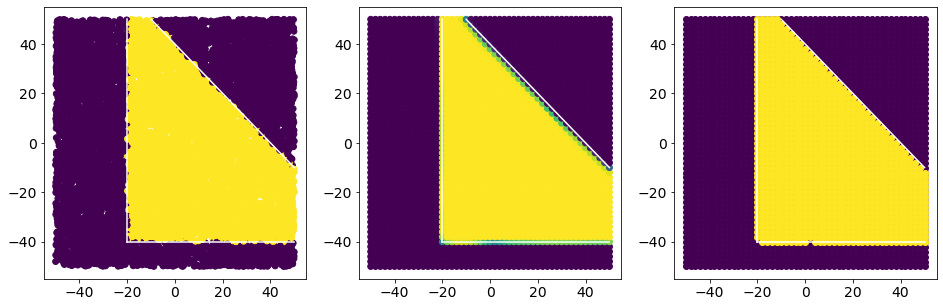

In [61]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_incr[:,0],x_incr[:,1],c=y_incr)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred6)
boundaries()
ax=AX[2]
W1=np.where(pred6>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [63]:
# evaluate model
score6 = model_incr.evaluate(x_valid_incr, y_valid_incr, verbose=2)

# print performance
print()
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])


Test loss: 0.028615956939873285
Test accuracy: 0.9865000247955322


## AUGMENTATION OF DATA

X augmentated: (8000, 2)
2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 8000
train: 6400


<function matplotlib.pyplot.show(close=None, block=None)>

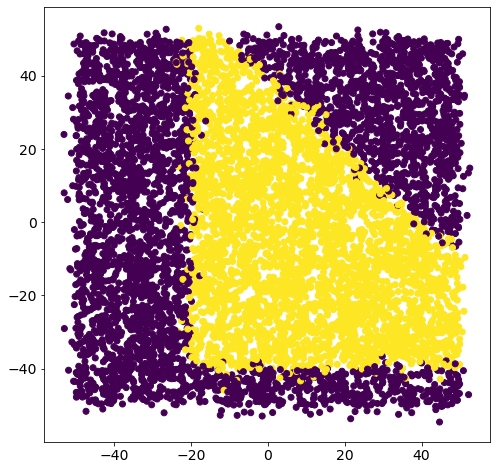

In [64]:
TYPE=1
x_aug = np.loadtxt(filename("data",TYPE), delimiter=' ')      #non serve creare una nuova cartella, i dati vengono presi dalla cartella iniziale 'DATA' 
y_aug = np.loadtxt(filename("labels",TYPE), delimiter=' ')

#creating noise
x1_noise = np.random.normal(0,2,4000)
x2_noise = np.random.normal(0,2,4000)
x_noise = np.array((x1_noise,x2_noise)).T

#concatenating noise+samples
x_aug = np.concatenate((x_aug,x_aug+x_noise))
y_aug = np.concatenate((y_aug,y_aug))
print("X augmentated:",x_aug.shape) 

N_aug = len(x_aug)

# dim. of a sample
L = len(x_aug[0])
print(L)

for i in range(10):
    print(x_aug[i],y_aug[i])

N_train_aug = int(perc_train * N_aug)
print(f'data: {N_aug}\ntrain: {N_train_aug}')

plt.figure(figsize = (8,8))
plt.scatter(x_aug[:,0],x_aug[:,1],c=y_aug) #tutte le righe della colonna 0, tutte le righe della colonna 1
plt.show

### split in train and test set

In [65]:
(x_train_aug, y_train_aug) = (x_aug[0:N_train_aug],y_aug[0:N_train_aug])
(x_valid_aug, y_valid_aug) = (x_aug[N_train_aug:],y_aug[N_train_aug:])
print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))

Train: 6400 	 Validation: 1600


### Rescale of data

In [66]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_aug = min_max_scaler.fit_transform(x_train_aug)
min_max_scaleri = preprocessing.MinMaxScaler()
x_valid_aug = min_max_scaleri.fit_transform(x_valid_aug)

### Training of model

In [67]:
# create the deep neural net
model_aug=create_DNN1(5, 'selu', 30, 0.1,'Nadam','he_normal') #best parameters for now


# train DNN and store training info in history
fit_aug=model_aug.fit(x_train_aug, y_train_aug,
          batch_size=50,
          epochs=nepoch,
          verbose=2,
          validation_data=(x_valid_aug, y_valid_aug))

Train on 6400 samples, validate on 1600 samples
Epoch 1/400
 - 2s - loss: 0.6063 - accuracy: 0.6450 - val_loss: 0.5412 - val_accuracy: 0.7100
Epoch 2/400
 - 1s - loss: 0.4713 - accuracy: 0.7513 - val_loss: 0.4652 - val_accuracy: 0.7556
Epoch 3/400
 - 1s - loss: 0.4049 - accuracy: 0.8072 - val_loss: 0.3436 - val_accuracy: 0.8419
Epoch 4/400
 - 1s - loss: 0.2765 - accuracy: 0.8839 - val_loss: 0.2250 - val_accuracy: 0.8875
Epoch 5/400
 - 1s - loss: 0.1813 - accuracy: 0.9244 - val_loss: 0.1377 - val_accuracy: 0.9425
Epoch 6/400
 - 0s - loss: 0.1375 - accuracy: 0.9438 - val_loss: 0.1185 - val_accuracy: 0.9519
Epoch 7/400
 - 0s - loss: 0.1202 - accuracy: 0.9475 - val_loss: 0.4389 - val_accuracy: 0.8494
Epoch 8/400
 - 0s - loss: 0.1172 - accuracy: 0.9502 - val_loss: 0.1561 - val_accuracy: 0.9375
Epoch 9/400
 - 0s - loss: 0.1065 - accuracy: 0.9581 - val_loss: 0.1478 - val_accuracy: 0.9344
Epoch 10/400
 - 0s - loss: 0.1076 - accuracy: 0.9566 - val_loss: 0.1431 - val_accuracy: 0.9406
Epoch 11/40

Epoch 87/400
 - 0s - loss: 0.0606 - accuracy: 0.9761 - val_loss: 0.1049 - val_accuracy: 0.9550
Epoch 88/400
 - 0s - loss: 0.0584 - accuracy: 0.9786 - val_loss: 0.0998 - val_accuracy: 0.9606
Epoch 89/400
 - 0s - loss: 0.0597 - accuracy: 0.9777 - val_loss: 0.0943 - val_accuracy: 0.9625
Epoch 90/400
 - 0s - loss: 0.0580 - accuracy: 0.9786 - val_loss: 0.1213 - val_accuracy: 0.9569
Epoch 91/400
 - 0s - loss: 0.0605 - accuracy: 0.9773 - val_loss: 0.0942 - val_accuracy: 0.9625
Epoch 92/400
 - 0s - loss: 0.0614 - accuracy: 0.9764 - val_loss: 0.1520 - val_accuracy: 0.9388
Epoch 93/400
 - 0s - loss: 0.0575 - accuracy: 0.9772 - val_loss: 0.1092 - val_accuracy: 0.9538
Epoch 94/400
 - 0s - loss: 0.0594 - accuracy: 0.9769 - val_loss: 0.1154 - val_accuracy: 0.9538
Epoch 95/400
 - 0s - loss: 0.0618 - accuracy: 0.9747 - val_loss: 0.1195 - val_accuracy: 0.9556
Epoch 96/400
 - 0s - loss: 0.0575 - accuracy: 0.9798 - val_loss: 0.0948 - val_accuracy: 0.9638
Epoch 97/400
 - 1s - loss: 0.0589 - accuracy: 0.97

Epoch 173/400
 - 1s - loss: 0.0547 - accuracy: 0.9806 - val_loss: 0.0980 - val_accuracy: 0.9625
Epoch 174/400
 - 0s - loss: 0.0562 - accuracy: 0.9798 - val_loss: 0.0953 - val_accuracy: 0.9600
Epoch 175/400
 - 1s - loss: 0.0550 - accuracy: 0.9797 - val_loss: 0.1092 - val_accuracy: 0.9600
Epoch 176/400
 - 1s - loss: 0.0605 - accuracy: 0.9787 - val_loss: 0.1084 - val_accuracy: 0.9588
Epoch 177/400
 - 1s - loss: 0.0567 - accuracy: 0.9781 - val_loss: 0.1027 - val_accuracy: 0.9550
Epoch 178/400
 - 0s - loss: 0.0573 - accuracy: 0.9800 - val_loss: 0.0936 - val_accuracy: 0.9588
Epoch 179/400
 - 0s - loss: 0.0589 - accuracy: 0.9784 - val_loss: 0.0934 - val_accuracy: 0.9600
Epoch 180/400
 - 0s - loss: 0.0613 - accuracy: 0.9758 - val_loss: 0.0967 - val_accuracy: 0.9600
Epoch 181/400
 - 0s - loss: 0.0567 - accuracy: 0.9795 - val_loss: 0.1055 - val_accuracy: 0.9588
Epoch 182/400
 - 0s - loss: 0.0565 - accuracy: 0.9794 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 183/400
 - 0s - loss: 0.0586 - acc

Epoch 259/400
 - 1s - loss: 0.0549 - accuracy: 0.9797 - val_loss: 0.0988 - val_accuracy: 0.9588
Epoch 260/400
 - 1s - loss: 0.0571 - accuracy: 0.9787 - val_loss: 0.1404 - val_accuracy: 0.9519
Epoch 261/400
 - 1s - loss: 0.0589 - accuracy: 0.9777 - val_loss: 0.1112 - val_accuracy: 0.9563
Epoch 262/400
 - 1s - loss: 0.0556 - accuracy: 0.9794 - val_loss: 0.0990 - val_accuracy: 0.9606
Epoch 263/400
 - 1s - loss: 0.0548 - accuracy: 0.9803 - val_loss: 0.0995 - val_accuracy: 0.9581
Epoch 264/400
 - 1s - loss: 0.0553 - accuracy: 0.9786 - val_loss: 0.1244 - val_accuracy: 0.9538
Epoch 265/400
 - 1s - loss: 0.0550 - accuracy: 0.9798 - val_loss: 0.0924 - val_accuracy: 0.9619
Epoch 266/400
 - 0s - loss: 0.0552 - accuracy: 0.9806 - val_loss: 0.1044 - val_accuracy: 0.9563
Epoch 267/400
 - 1s - loss: 0.0582 - accuracy: 0.9783 - val_loss: 0.1039 - val_accuracy: 0.9600
Epoch 268/400
 - 0s - loss: 0.0580 - accuracy: 0.9780 - val_loss: 0.1034 - val_accuracy: 0.9625
Epoch 269/400
 - 1s - loss: 0.0544 - acc

Epoch 345/400
 - 0s - loss: 0.0540 - accuracy: 0.9814 - val_loss: 0.1165 - val_accuracy: 0.9550
Epoch 346/400
 - 0s - loss: 0.0543 - accuracy: 0.9809 - val_loss: 0.1075 - val_accuracy: 0.9613
Epoch 347/400
 - 0s - loss: 0.0564 - accuracy: 0.9797 - val_loss: 0.0937 - val_accuracy: 0.9600
Epoch 348/400
 - 0s - loss: 0.0550 - accuracy: 0.9808 - val_loss: 0.1007 - val_accuracy: 0.9594
Epoch 349/400
 - 0s - loss: 0.0538 - accuracy: 0.9794 - val_loss: 0.1210 - val_accuracy: 0.9519
Epoch 350/400
 - 0s - loss: 0.0557 - accuracy: 0.9803 - val_loss: 0.0955 - val_accuracy: 0.9588
Epoch 351/400
 - 0s - loss: 0.0547 - accuracy: 0.9798 - val_loss: 0.0936 - val_accuracy: 0.9619
Epoch 352/400
 - 0s - loss: 0.0553 - accuracy: 0.9789 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 353/400
 - 0s - loss: 0.0538 - accuracy: 0.9806 - val_loss: 0.0936 - val_accuracy: 0.9581
Epoch 354/400
 - 0s - loss: 0.0555 - accuracy: 0.9798 - val_loss: 0.1105 - val_accuracy: 0.9556
Epoch 355/400
 - 0s - loss: 0.0539 - acc

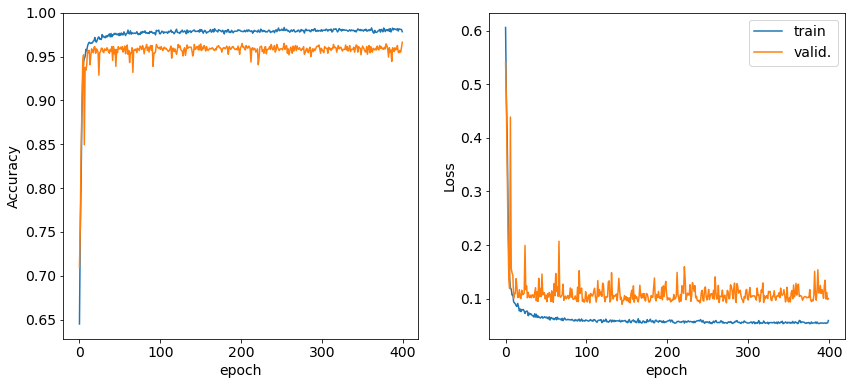

In [68]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_aug.history['accuracy'],label="train")
ax.plot(fit_aug.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit_aug.history['loss'],label="train")
ax.plot(fit_aug.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [69]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),"******",len(grid))
print(grid[-1])

# RESCALE

min_max_scalern = preprocessing.MinMaxScaler()
grid_r= min_max_scalern.fit_transform(grid)

pred7 = model_aug.predict(grid_r)

51 ****** 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

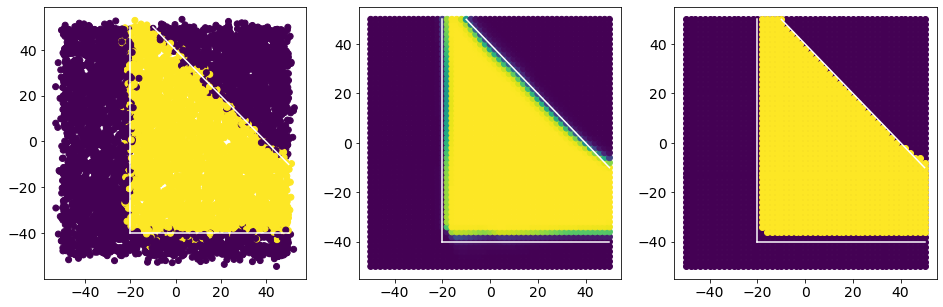

In [70]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred7)
boundaries()
ax=AX[2]
W1=np.where(pred7>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [71]:
# evaluate model
score7 = model_aug.evaluate(x_valid_aug, y_valid_aug, verbose=2)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09966681140474976
Test accuracy: 0.9662500023841858
